# <font color = 'blue'> Insights about Prosper Loan </font>

## by Lloyd Ponrajah

## <font color = 'blue'> Preliminary Wrangling </font>

###### The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl
sb.set_palette("colorblind")
import statsmodels.api as sm;

%matplotlib inline

In [2]:
prolon1 = pd.read_csv('ProsperData1.csv')
prolon2 = pd.read_csv('ProsperData2.csv')
prolon3 = pd.read_csv('ProsperData3.csv')
prolon4 = pd.read_csv('ProsperData4.csv')
prolon5 = pd.read_csv('ProsperData5.csv')


In [3]:
prolon1.shape[0]

9999

In [4]:
proloan = prolon1.append(prolon2, ignore_index = True)

In [5]:
proloan = proloan.append(prolon3, ignore_index = True)

In [6]:
proloan = proloan.append(prolon4, ignore_index = True)

In [7]:
proloan = proloan.append(prolon5, ignore_index = True)

In [8]:
proloan.shape[0]

49999

In [11]:
proloan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### <font color = 'blue'> Structure of dataset </font>


In [12]:
proloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 81 columns):
ListingKey                             49999 non-null object
ListingNumber                          49999 non-null int64
ListingCreationDate                    49999 non-null object
CreditGrade                            12701 non-null object
Term                                   49999 non-null int64
LoanStatus                             49999 non-null object
ClosedDate                             24219 non-null object
BorrowerAPR                            49992 non-null float64
BorrowerRate                           49999 non-null float64
LenderYield                            49999 non-null float64
EstimatedEffectiveYield                37248 non-null float64
EstimatedLoss                          37248 non-null float64
EstimatedReturn                        37248 non-null float64
ProsperRating (numeric)                37248 non-null float64
ProsperRating (Alpha)           

###### Prosper uses a proprietary system to evaluate applicants consistently. Investors also use it to decide whether to commit to invest in a given loan.

###### Prosper assigns the loan applicant a rating. It determines the interest rate that they will pay for their loan. Ratings range from AA, for the highest grade, then A, B, C, D, E, and HR for the lowest.

###### This rating system was introduced for loans that originated after 2009. Therfore for this analysis I'll be only focusing on data that has a Prosper rating captured against it.

###### I intend to explore the following features:
    
    LoanStatus    
    BorrowerAPR    
    BorrowerRate    
    ProsperRating (numeric)    
    ProsperRating (Alpha)    
    ListingCategory    
    EmpoymentStatus    
    CreditScoreRangeLower    
    CreditScoreRangeUpper    
    LoanOriginationQuarter

## <font color = 'blue'> Data Wrangling </font>

##### Step 1. Remove records that don't have Prosper Rating

In [9]:
proloan_nn = proloan.copy()
proloan_nn = proloan_nn.loc[proloan_nn['ProsperRating (Alpha)'].notnull()]

##### Step 2. Order Prosper rating: AA, A, B, C, D, E and HR where AA is the lowest risk down to HR which actually stands for high risk.

In [10]:
prorat_odr = ['AA','A','B','C','D','E','HR']
proratodr = pd.api.types.CategoricalDtype(ordered = True, categories = prorat_odr)
proloan_nn['ProsperRating (Alpha)'] = proloan_nn['ProsperRating (Alpha)'].astype(proratodr)

##### Step 3. Order yearly quaters in chronological order

In [11]:
qtr_odr = ['Q3 2009','Q4 2009','Q1 2010','Q2 2010','Q3 2010','Q4 2010','Q1 2011','Q2 2011','Q3 2011','Q4 2011','Q1 2012','Q2 2012','Q3 2012','Q4 2012','Q1 2013','Q2 2013']
qtrodr = pd.api.types.CategoricalDtype(ordered = True, categories = qtr_odr)
proloan_nn['LoanOriginationQuarter'] = proloan_nn['LoanOriginationQuarter'].astype(qtrodr)

##### Step 4. Order loan status category

In [12]:
ln_sts = ['Current','Completed','Chargedoff','Defaulted','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']
lnsts = pd.api.types.CategoricalDtype(ordered = True, categories = ln_sts)
proloan_nn['LoanStatus'] = proloan_nn['LoanStatus'].astype(lnsts)

##### Step 5. Order Income Range category

In [13]:
In_ran = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed']
Inran = pd.api.types.CategoricalDtype(ordered = True, categories = In_ran)
proloan_nn['IncomeRange'] = proloan_nn['IncomeRange'].astype(Inran)

##### Step 3. Create new column that contains the year

In [14]:
proloan_nn['year'] = proloan_nn['LoanOriginationQuarter'].str.extract('(\s\d+)')

<br>
<br>

## <font color = 'blue'> Univariate Exploration </font>
<br>
<b>
To plot the univariate charts I chose the following categorical variables:
    
* Prosper Rating
* Yearly quaters
* Loan status
* Income range

In order to facilitate this I had to transform the variable data type from "string" to "category". 
I also purposefuly ordered them in a meaningful manner as opposed to simply ordering them either ascending or decending based on the count.</B>

##### CHART 1: Number of applicants per Prosper Rating


C     8047
B     6893
A     6443
D     6173
E     4298
HR    3026
AA    2368
Name: ProsperRating (Alpha), dtype: int64
AA
A
B
C
D
E
HR


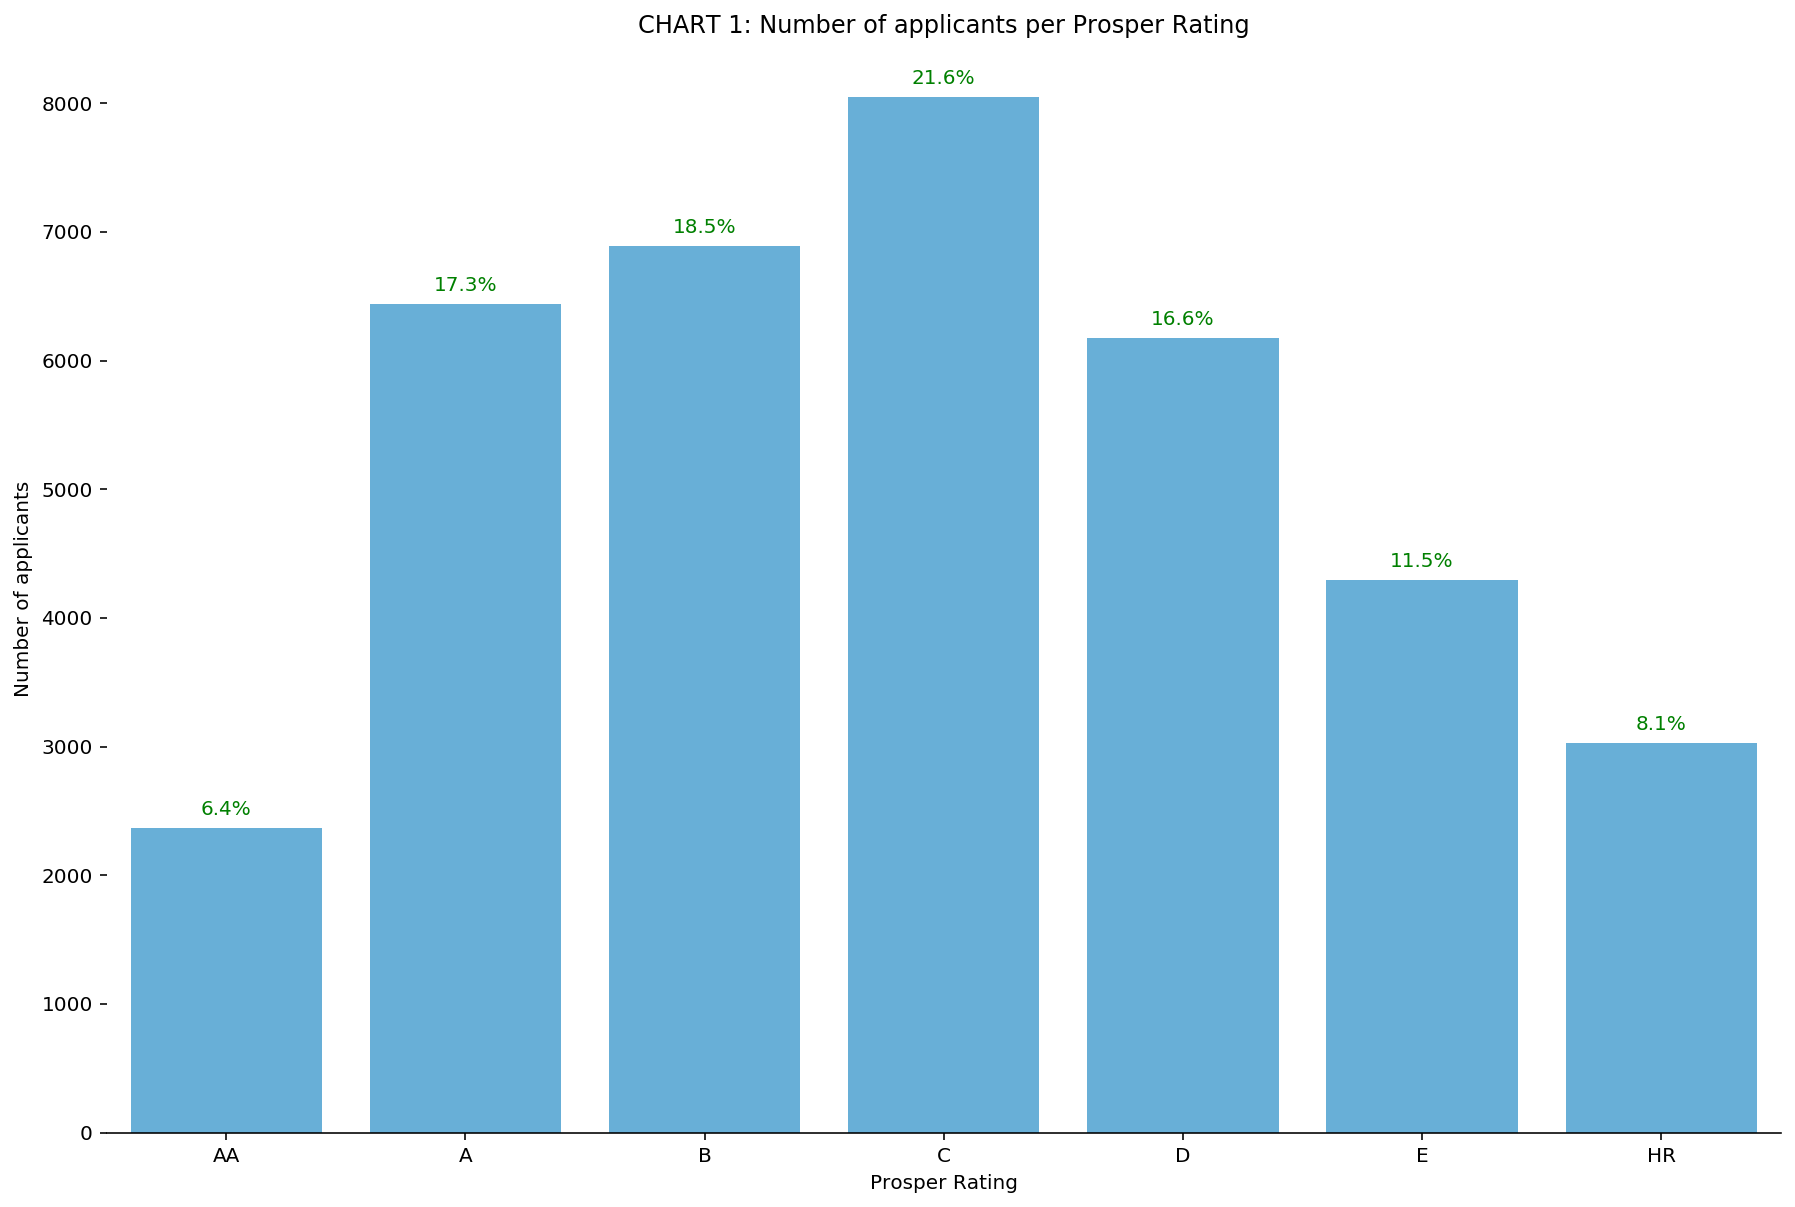

In [24]:
plt.figure(figsize=(15,10))
base_col = sb.color_palette()[9]
sb.countplot(data = proloan_nn, x = 'ProsperRating (Alpha)', color = base_col);

n_points = proloan_nn.shape[0]
rate_count = proloan_nn['ProsperRating (Alpha)'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip (locs, labels):
    count = rate_count[label.get_text()]
    pct_str = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count+100, pct_str, ha = 'center', color = 'g')

plt.title('CHART 1: Number of applicants per Prosper Rating');
plt.ylabel('Number of applicants');
plt.xlabel('Prosper Rating');
sb.despine(left=True)

##### Insights

###### This graph shows the comparison of the number of loans amoung Prosper Rating. There's clearly a normal distribution present in the chart.

<br>

##### CHART 2 : Number of applicants per loan status



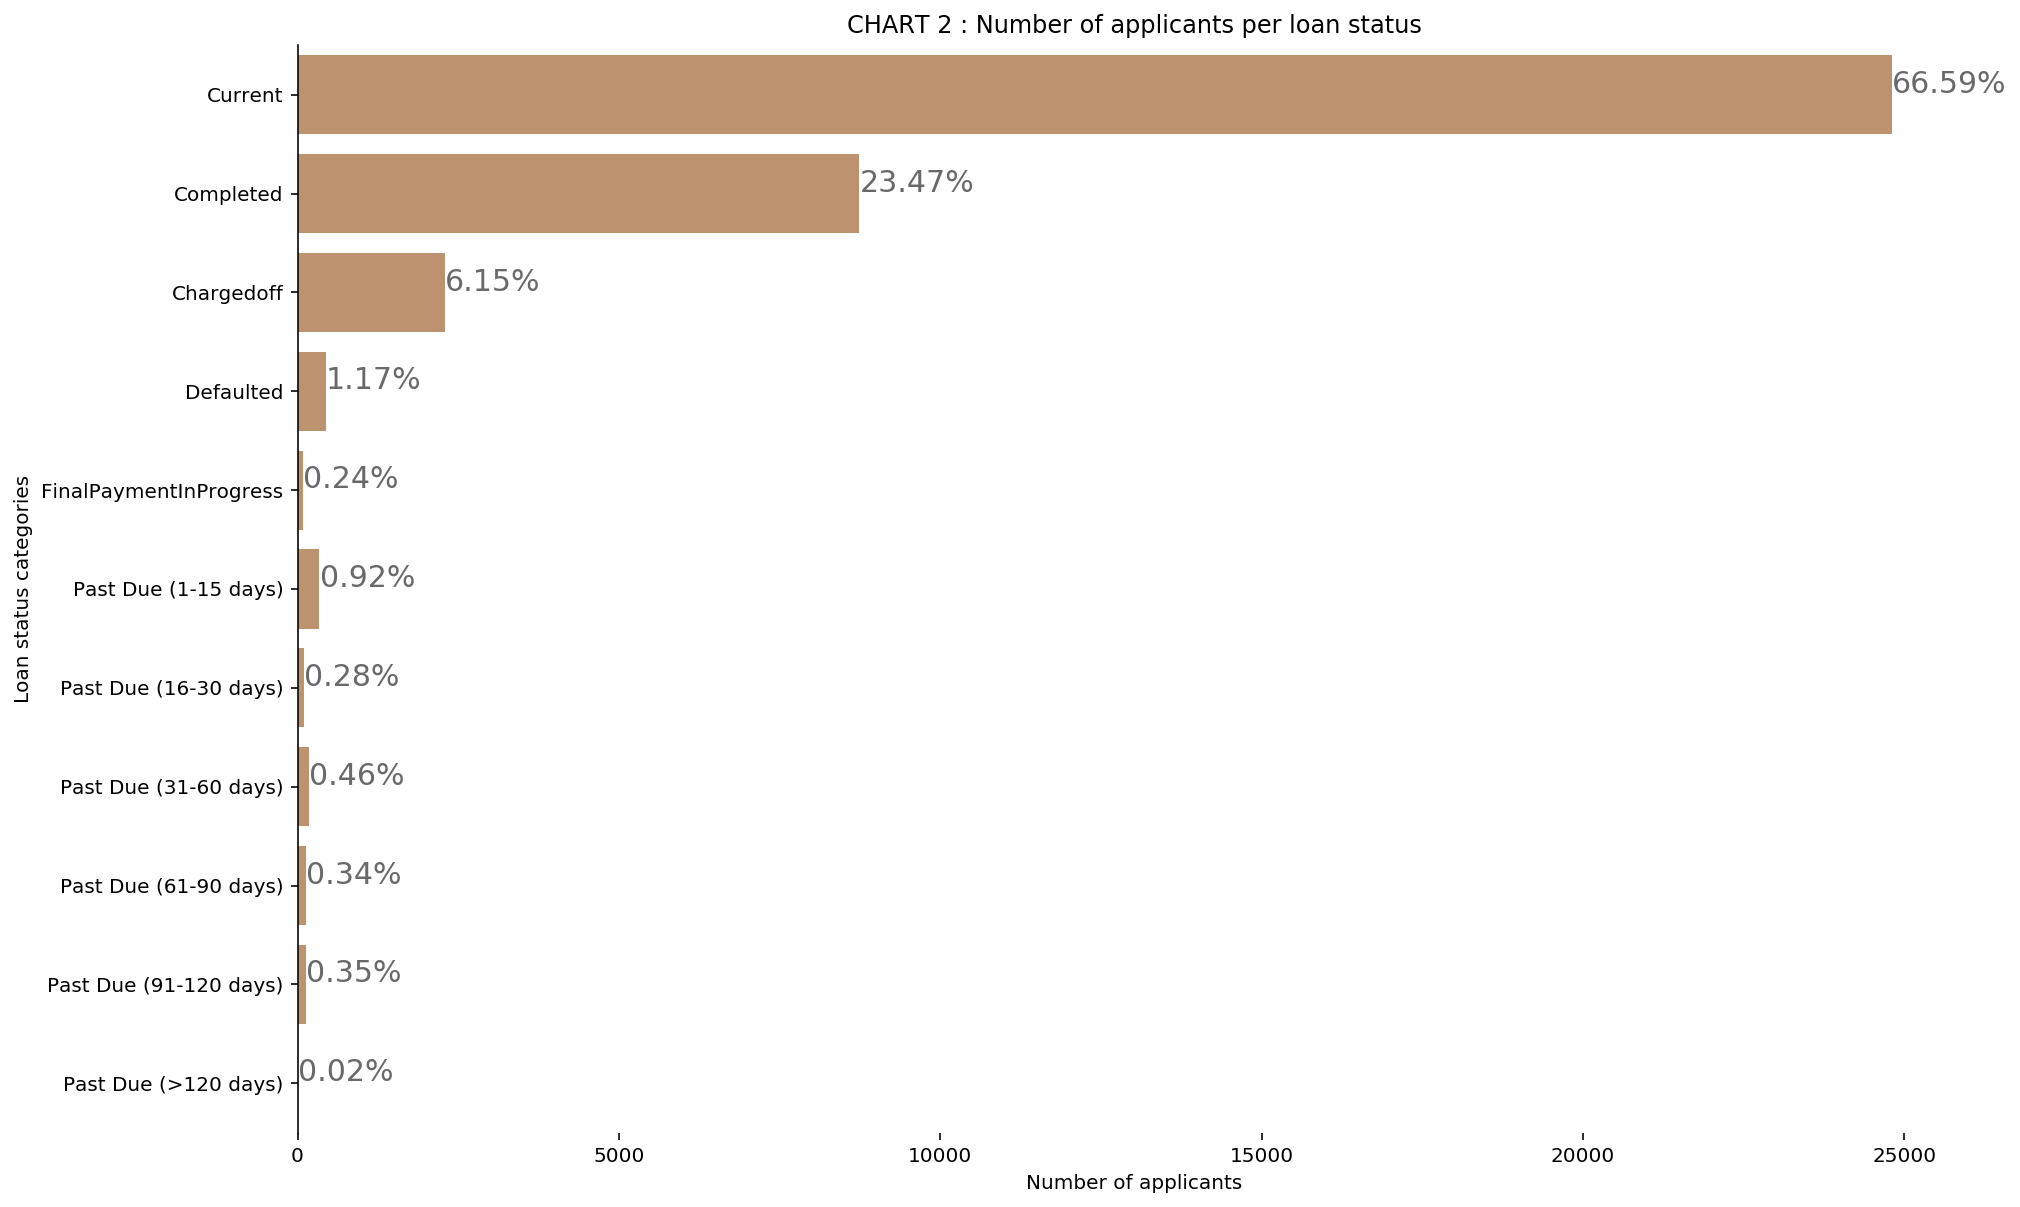

In [20]:
plt.figure(figsize=(15,10))
base_col = sb.color_palette()[5]
loanst = sb.countplot(data = proloan_nn, y = 'LoanStatus', color = base_col)

totals = []

for i in loanst.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in loanst.patches:
    # get_width pulls left or right; get_y pushes up or down
    loanst.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

plt.title('CHART 2 : Number of applicants per loan status');
plt.xlabel('Number of applicants')
plt.ylabel('Loan status categories');
sb.despine(bottom=True)

<br>

##### CHART 3: Number of applicants per credit range



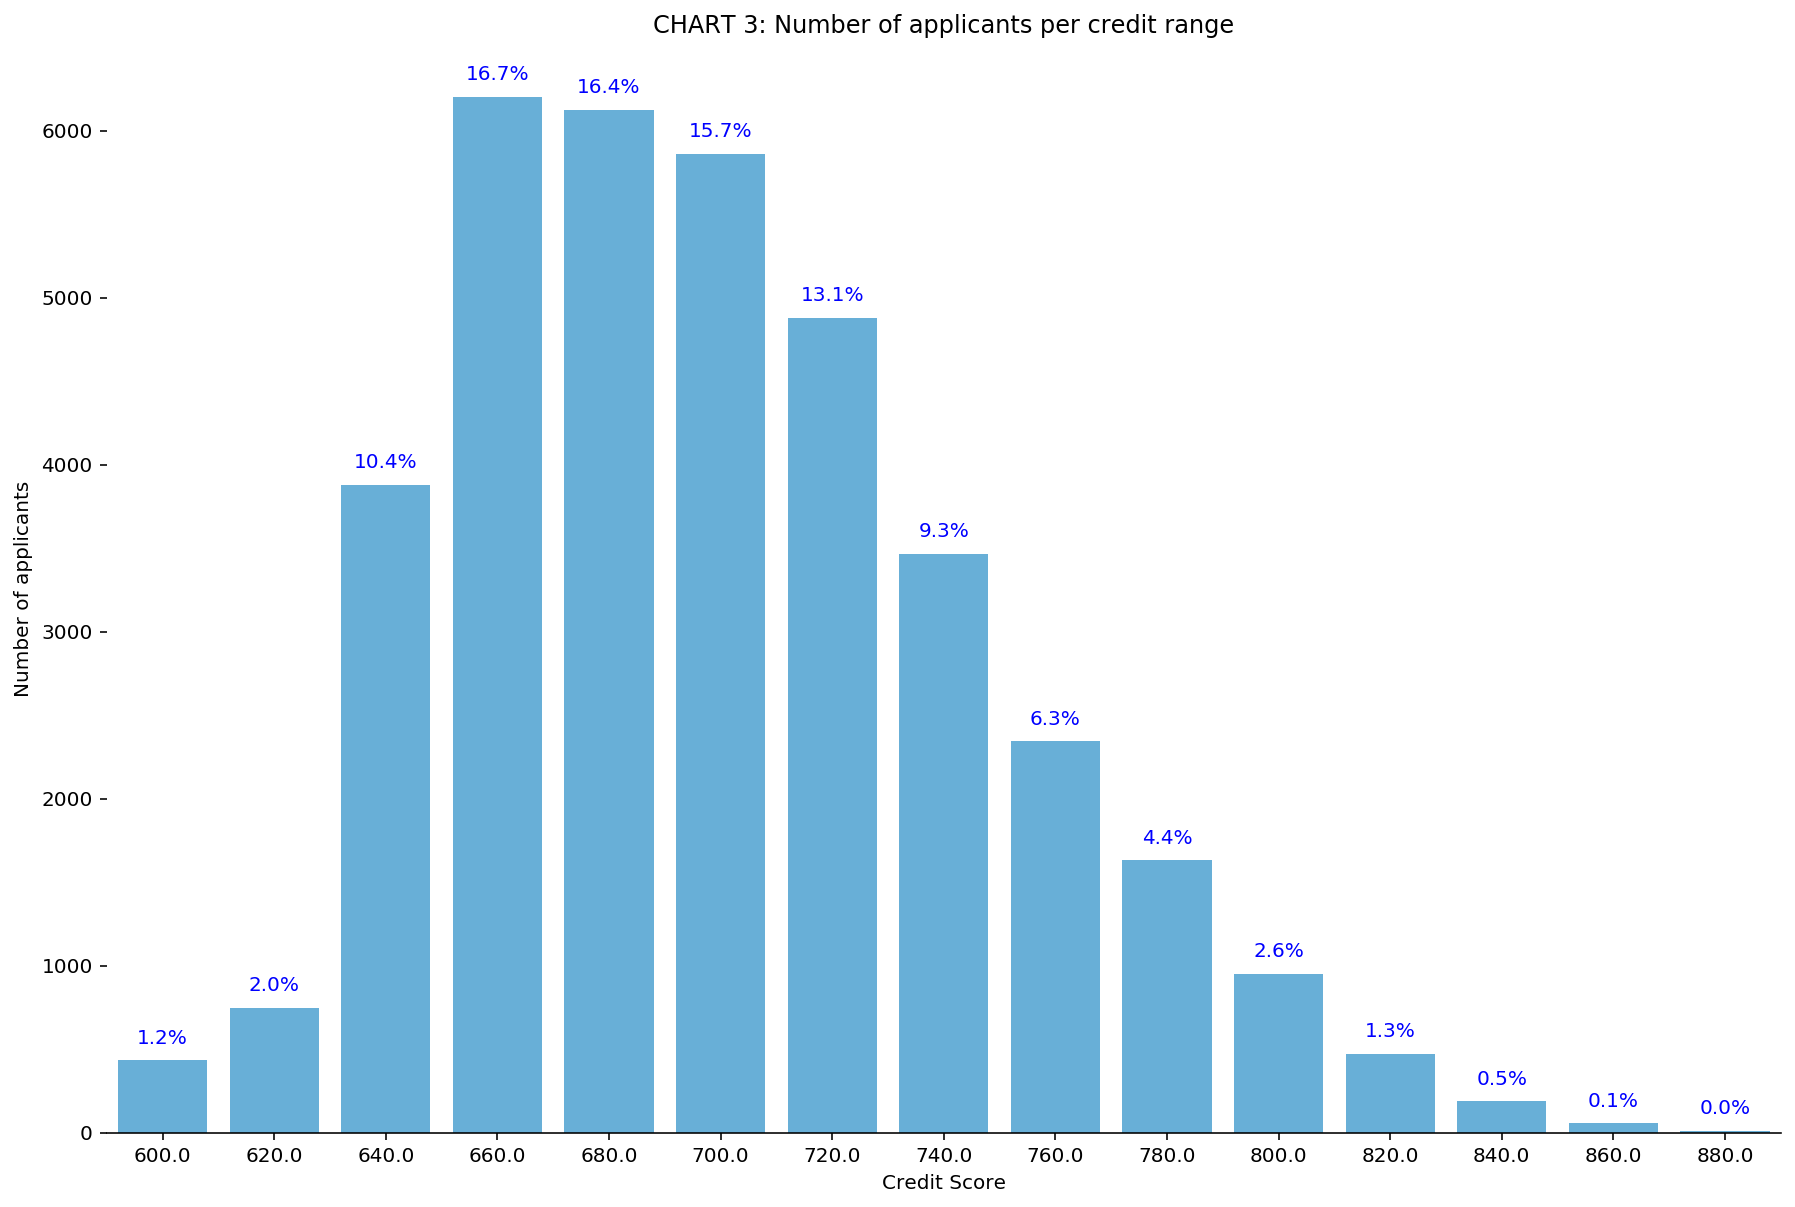

In [44]:
plt.figure(figsize=(15,10))
base_col = sb.color_palette()[9]
loanst = sb.countplot(data = proloan_nn, x = 'CreditScoreRangeLower', color = base_col)

n_points = proloan_nn.shape[0]
rate_count = proloan_nn['CreditScoreRangeLower'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip (locs, labels):
    a = label.get_text()
    count = rate_count[int(float(a))]
    pct_str = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+100, pct_str, ha = 'center', color = 'b')

plt.title('CHART 3: Number of applicants per credit range');
plt.ylabel('Number of applicants');
plt.xlabel('Credit Score');
sb.despine(left=True)

##### Insights

###### The interesting point to note in the above graph is that the vast majority of applicants who fall within the 660 - 700 credit score also seem to marry up with CHART 1 where they majority of applicants fall within Prosper rating C

<br>

##### CHART 4 : Number of applicants per income range

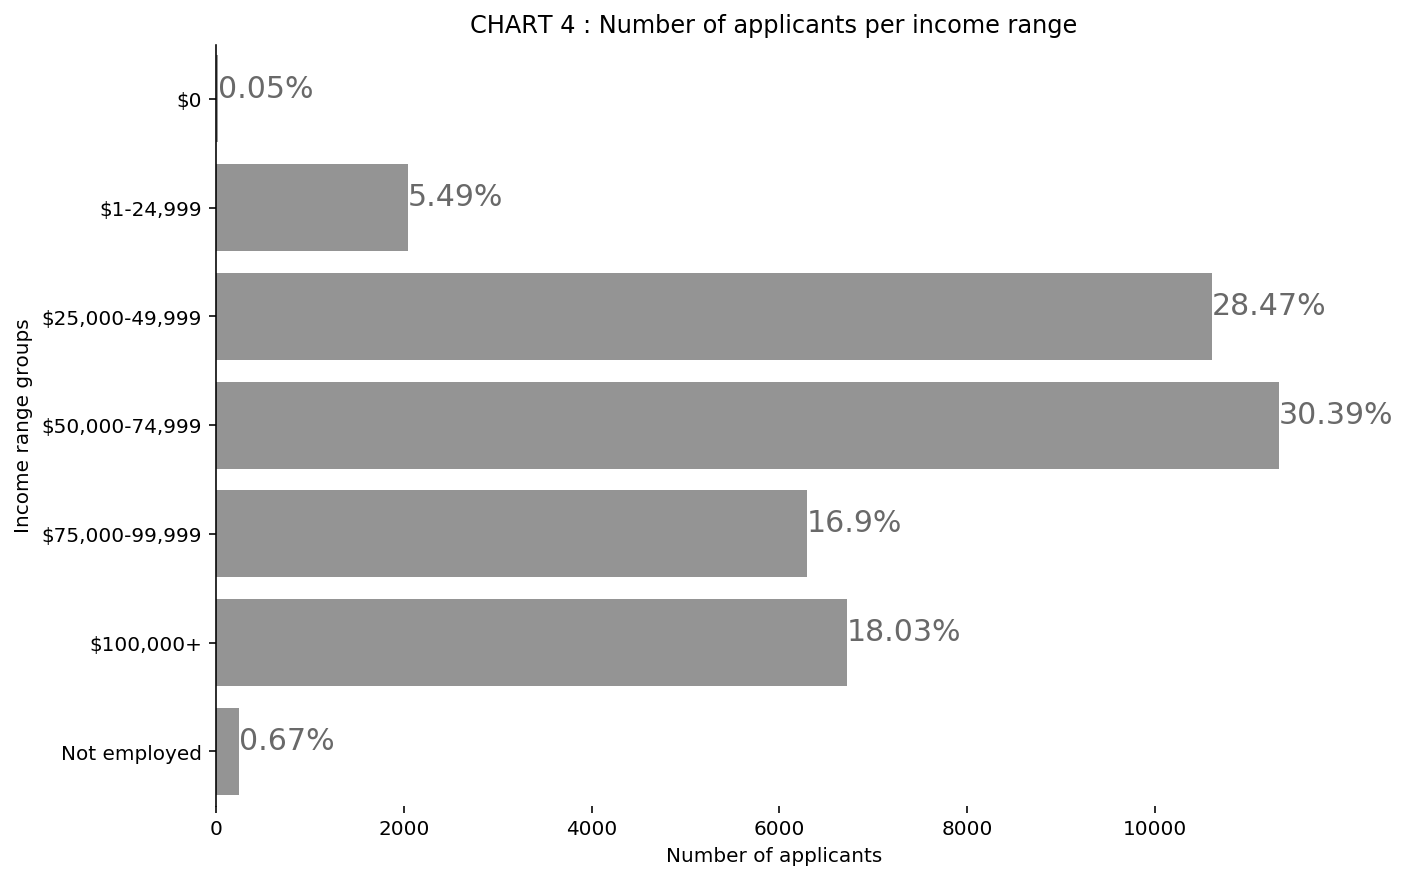

In [22]:
plt.figure(figsize=(10,7))
base_col = sb.color_palette()[7]
inrng = sb.countplot(data = proloan_nn, y = 'IncomeRange', color = base_col)

totals = []

for i in inrng.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in inrng.patches:
    # get_width pulls left or right; get_y pushes up or down
    inrng.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

plt.title('CHART 4 : Number of applicants per income range');
plt.xlabel('Number of applicants')
plt.ylabel('Income range groups');
sb.despine(bottom=True)

##### Insights

###### It's quite evident in this graph that the majority of applicants fall within the mid income group of \$25,000 - $74,999. Here too we can see a normal distribution amoungst the income range categories.
<br>
<br>

## <font color = 'blue'> Bivariate Exploration </font>
<br>


##### CHART 1: Comparison of Prosper Rating against Original Loan Amount


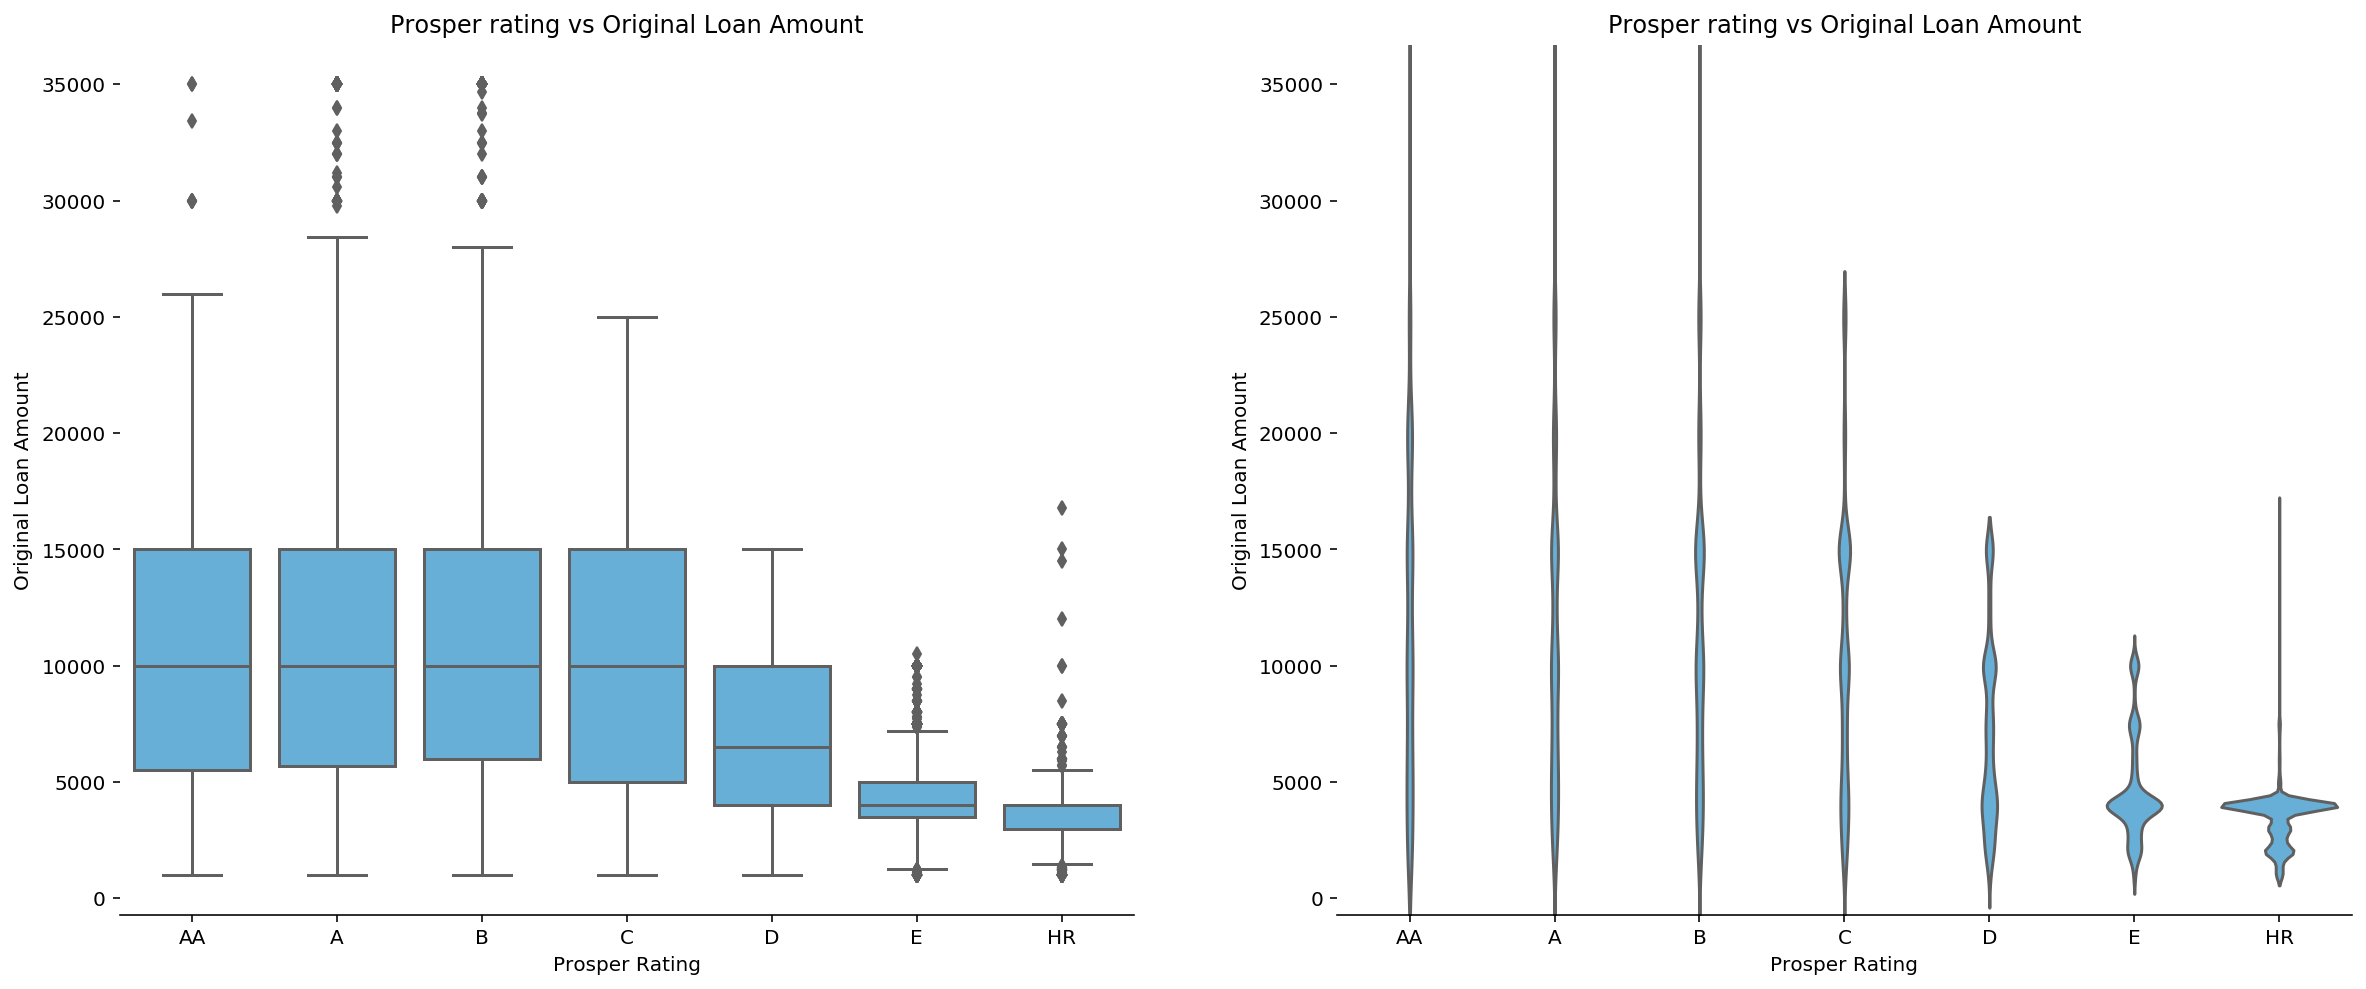

In [23]:
plt.figure(figsize=(20,8))
base_col = sb.color_palette()[9]

plt.subplot(1,2,1)
ax = sb.boxplot(data = proloan_nn, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', color = base_col)
plt.title('Prosper rating vs Original Loan Amount');
plt.ylabel('Original Loan Amount');
plt.xlabel('Prosper Rating');

plt.subplot(1,2,2)
sb.violinplot(data = proloan_nn, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', color = base_col, inner = None)
plt.ylim(ax.get_ylim())
plt.title('Prosper rating vs Original Loan Amount');
plt.ylabel('Original Loan Amount');
plt.xlabel('Prosper Rating');
sb.despine(left=True)

##### Insights

###### The above boxplot (and violin plot) indicate that Prosper ratings AA, A, B & C seem to have the same median of circa \$10,000 as the loan amount. They also seems to share the same third quartile that sits at \$15,000.
###### Applicants with Prosper rating E & HR seem to have the lowest loan amount with a median amount below \$4,000.

<br>

##### CHART 2: Comparison of successfully completed loans vs defaulted loans

<br>

###### As the first step I'm creating two sub datasets that comprises only defaulted loans and completed loans.

In [17]:
proloan_def = proloan_nn.loc[proloan_nn['LoanStatus'] == 'Defaulted']
proloan_defdf = proloan_def.groupby('LoanOriginationQuarter')['LP_GrossPrincipalLoss'].sum().reset_index()

In [18]:
proloan_com = proloan_nn.loc[proloan_nn['LoanStatus'] == 'Completed']
proloan_comdf = proloan_com.groupby('LoanOriginationQuarter')['LP_CustomerPayments'].sum().reset_index()

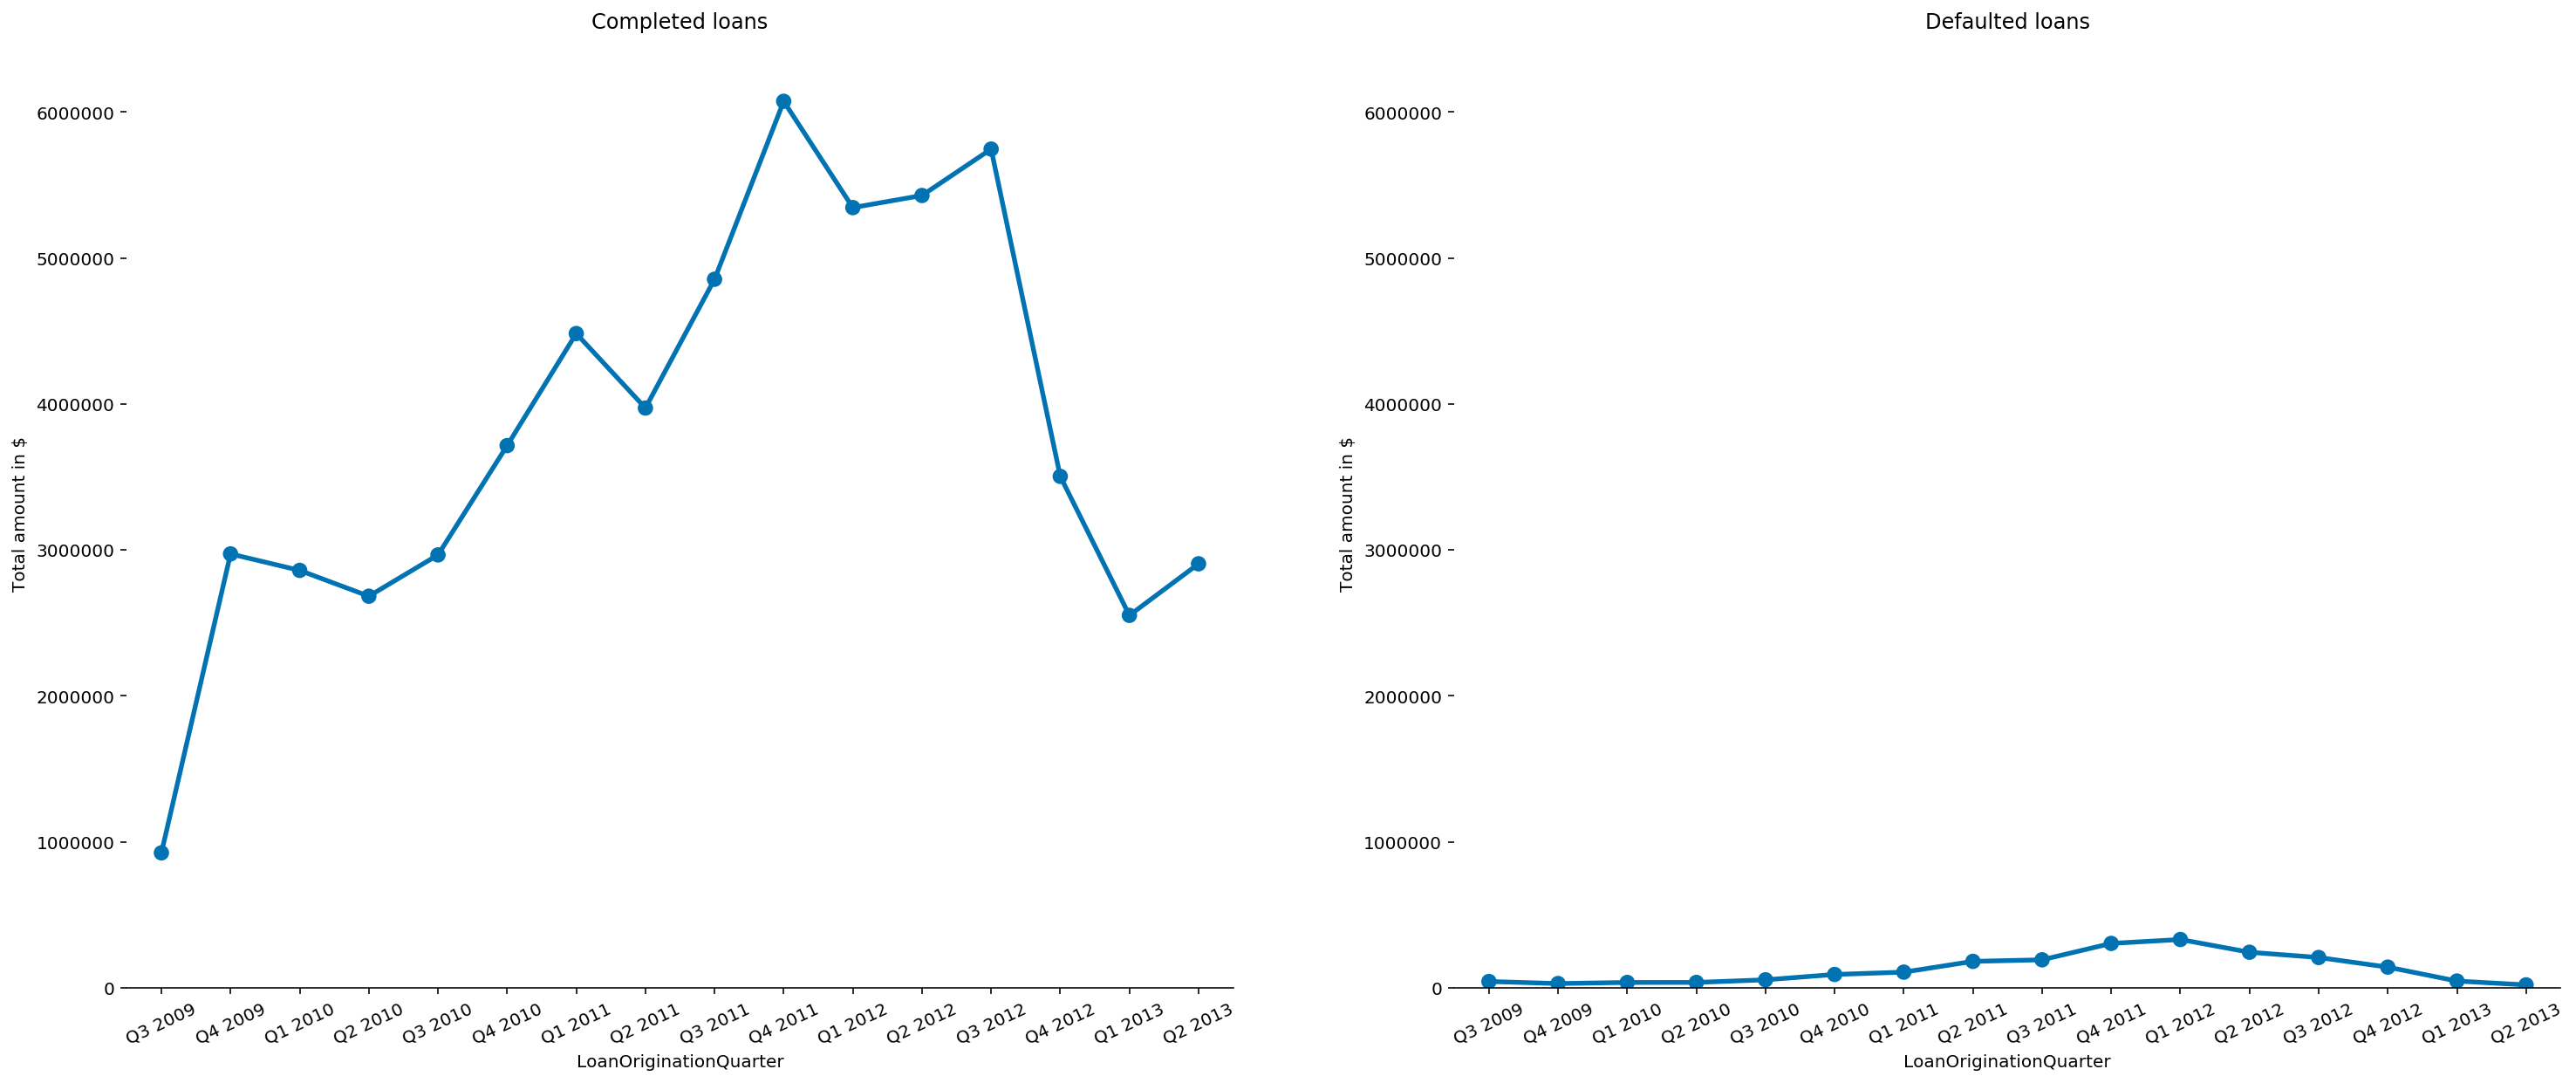

In [26]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
ax = sb.pointplot(data = proloan_comdf, x = 'LoanOriginationQuarter', y = 'LP_CustomerPayments')
plt.xticks(rotation = 25)
plt.ylim(0,6500000)
plt.title('Completed loans');
plt.ylabel('Total amount in $');

plt.subplot(1,2,2)
sb.pointplot(data = proloan_defdf, x = 'LoanOriginationQuarter', y = 'LP_GrossPrincipalLoss')
plt.ylim(ax.get_ylim())
plt.xticks(rotation = 25)
plt.title('Defaulted loans');
plt.ylabel('Total amount in $');
sb.despine(left=True)

##### Insights
###### The above graphs show the comparison between the completed loans and defaulted loans. We can see an interesting trend where there's a spike in both graphs around the 4th quater in the year 2011 and a gradual decline throughout 2012 and leading into 2013.

<br>

##### CHART 3: Interest rate per Prosper Rating


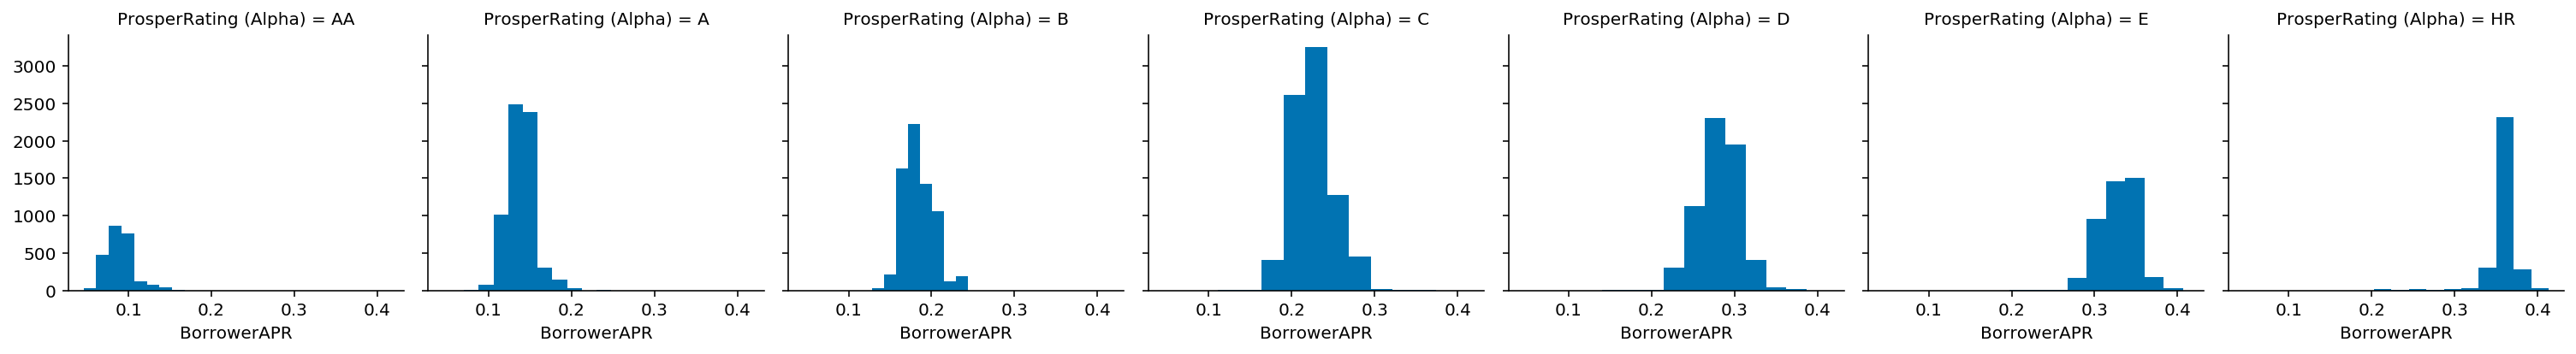

In [27]:
g = sb.FacetGrid(data = proloan_nn, col = 'ProsperRating (Alpha)');
g.map(plt.hist, 'BorrowerAPR');

##### Insights

###### Prosper offers loans that range from \$2,000 to $40,000. Its personal loans carry a fixed annual percentage rate between 6.95 percent and 35.99 percent for first time borrowers. The above facet grid shows the borrower's Annual Percentage Rate (APR) according to the Prosper ratings. It's interesting to note how the APR increases along with the risk level.

<br>

## <font color = 'blue'> Multivariate Exploration </font>



##### CHART 1: Profit margin

In [15]:
proloan_com_pi = proloan_nn.loc[proloan_nn['LoanStatus'] == 'Completed']
proloan_compidf = proloan_com_pi.groupby('LoanOriginationQuarter')['LP_CustomerPayments','LoanOriginalAmount'].sum().reset_index()
proloan_compidf['AmtDiff'] = proloan_compidf['LP_CustomerPayments']-proloan_compidf['LoanOriginalAmount']

In [16]:
proloan_compidf['propct'] = 100*(proloan_compidf['AmtDiff']/proloan_compidf['AmtDiff'].sum())

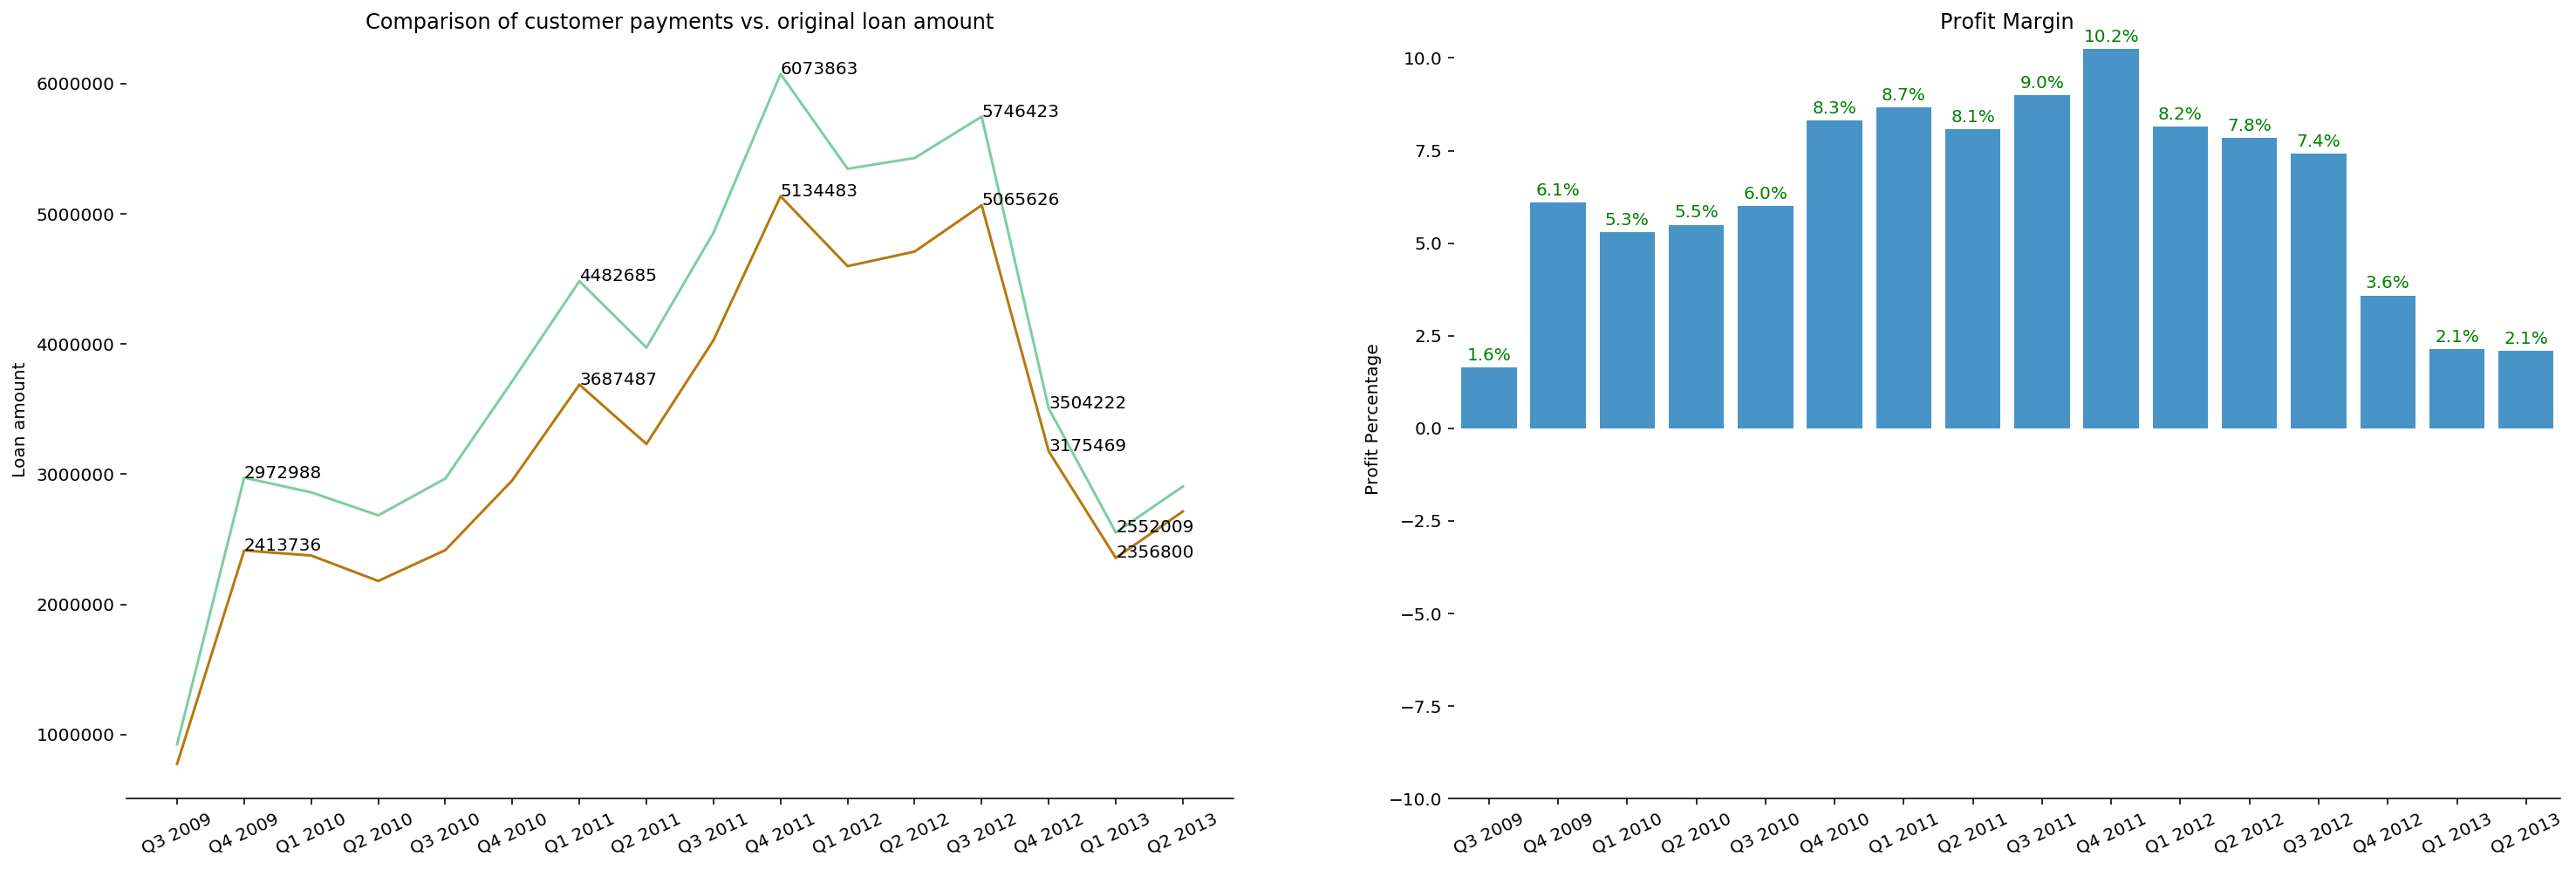

In [29]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
ax = sb.lineplot(x = proloan_compidf['LoanOriginationQuarter'], y = proloan_compidf['LP_CustomerPayments'], color = '#7DCEA0')
ax = sb.lineplot(x = proloan_compidf['LoanOriginationQuarter'], y = proloan_compidf['LoanOriginalAmount'], color = '#B9770E')
ax.text('Q4 2009', 2972988,'2972988')
ax.text('Q4 2009', 2413736,'2413736')
ax.text('Q1 2011', 4482685,'4482685')
ax.text('Q1 2011', 3687487,'3687487')
ax.text('Q4 2011', 6073863,'6073863')
ax.text('Q4 2011', 5134483,'5134483')
ax.text('Q3 2012', 5746423,'5746423')
ax.text('Q3 2012', 5065626,'5065626')
ax.text('Q4 2012', 3504222,'3504222')
ax.text('Q4 2012', 3175469,'3175469')
ax.text('Q1 2013', 2552009,'2552009')
ax.text('Q1 2013', 2356800,'2356800')
plt.xticks(rotation = 25);
plt.title('Comparison of customer payments vs. original loan amount')
plt.ylabel('Loan amount')
plt.xlabel('');
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False

plt.subplot(1,2,2)
ax = sb.barplot(x = proloan_compidf['LoanOriginationQuarter'], y = proloan_compidf['propct'], color = '#3498DB');
plt.xticks(rotation = 25);
plt.ylim(-10,10.5);
plt.title('Profit Margin')
plt.ylabel('Profit Percentage')
plt.xlabel('');

n_points = proloan_compidf.shape[0]
rate_count = pd.Series(proloan_compidf['propct'].values, index = proloan_compidf['LoanOriginationQuarter'].values)
locs, labels = plt.xticks()

for loc, label in zip (locs, labels):
    count = rate_count[label.get_text()]
    pct_str = '{:0.1f}%'.format(count)
    
    plt.text(loc, count+.2, pct_str, ha = 'center', color = 'g')

##### Insights

###### It's interesting to note the sudden jump in profit in 4th quater of 2009 and a gradual increase up until the 4th quater of 2011 before it starts to decline.

<br>

##### CHART 2 : Plot Matrices (BorrowerAPR vs DebitToIncomeRatio vs StatedMonthlyIncome)

###### Making a copy of the dataset that contains records where 

In [15]:
proloan_nn_t = proloan_nn.copy()
proloan_nn_t = proloan_nn_t.loc[proloan_nn_t['IncomeVerifiable'] == True & proloan_nn_t['DebtToIncomeRatio'].notnull()]
proloan_nn_t = proloan_nn_t.loc[proloan_nn_t['DebtToIncomeRatio'] < 1.0]
proloan_nn_t = proloan_nn_t.loc[proloan_nn_t['StatedMonthlyIncome'] < 100000.00]
proloan_nn_t.dropna(subset=['DebtToIncomeRatio'], inplace = True)

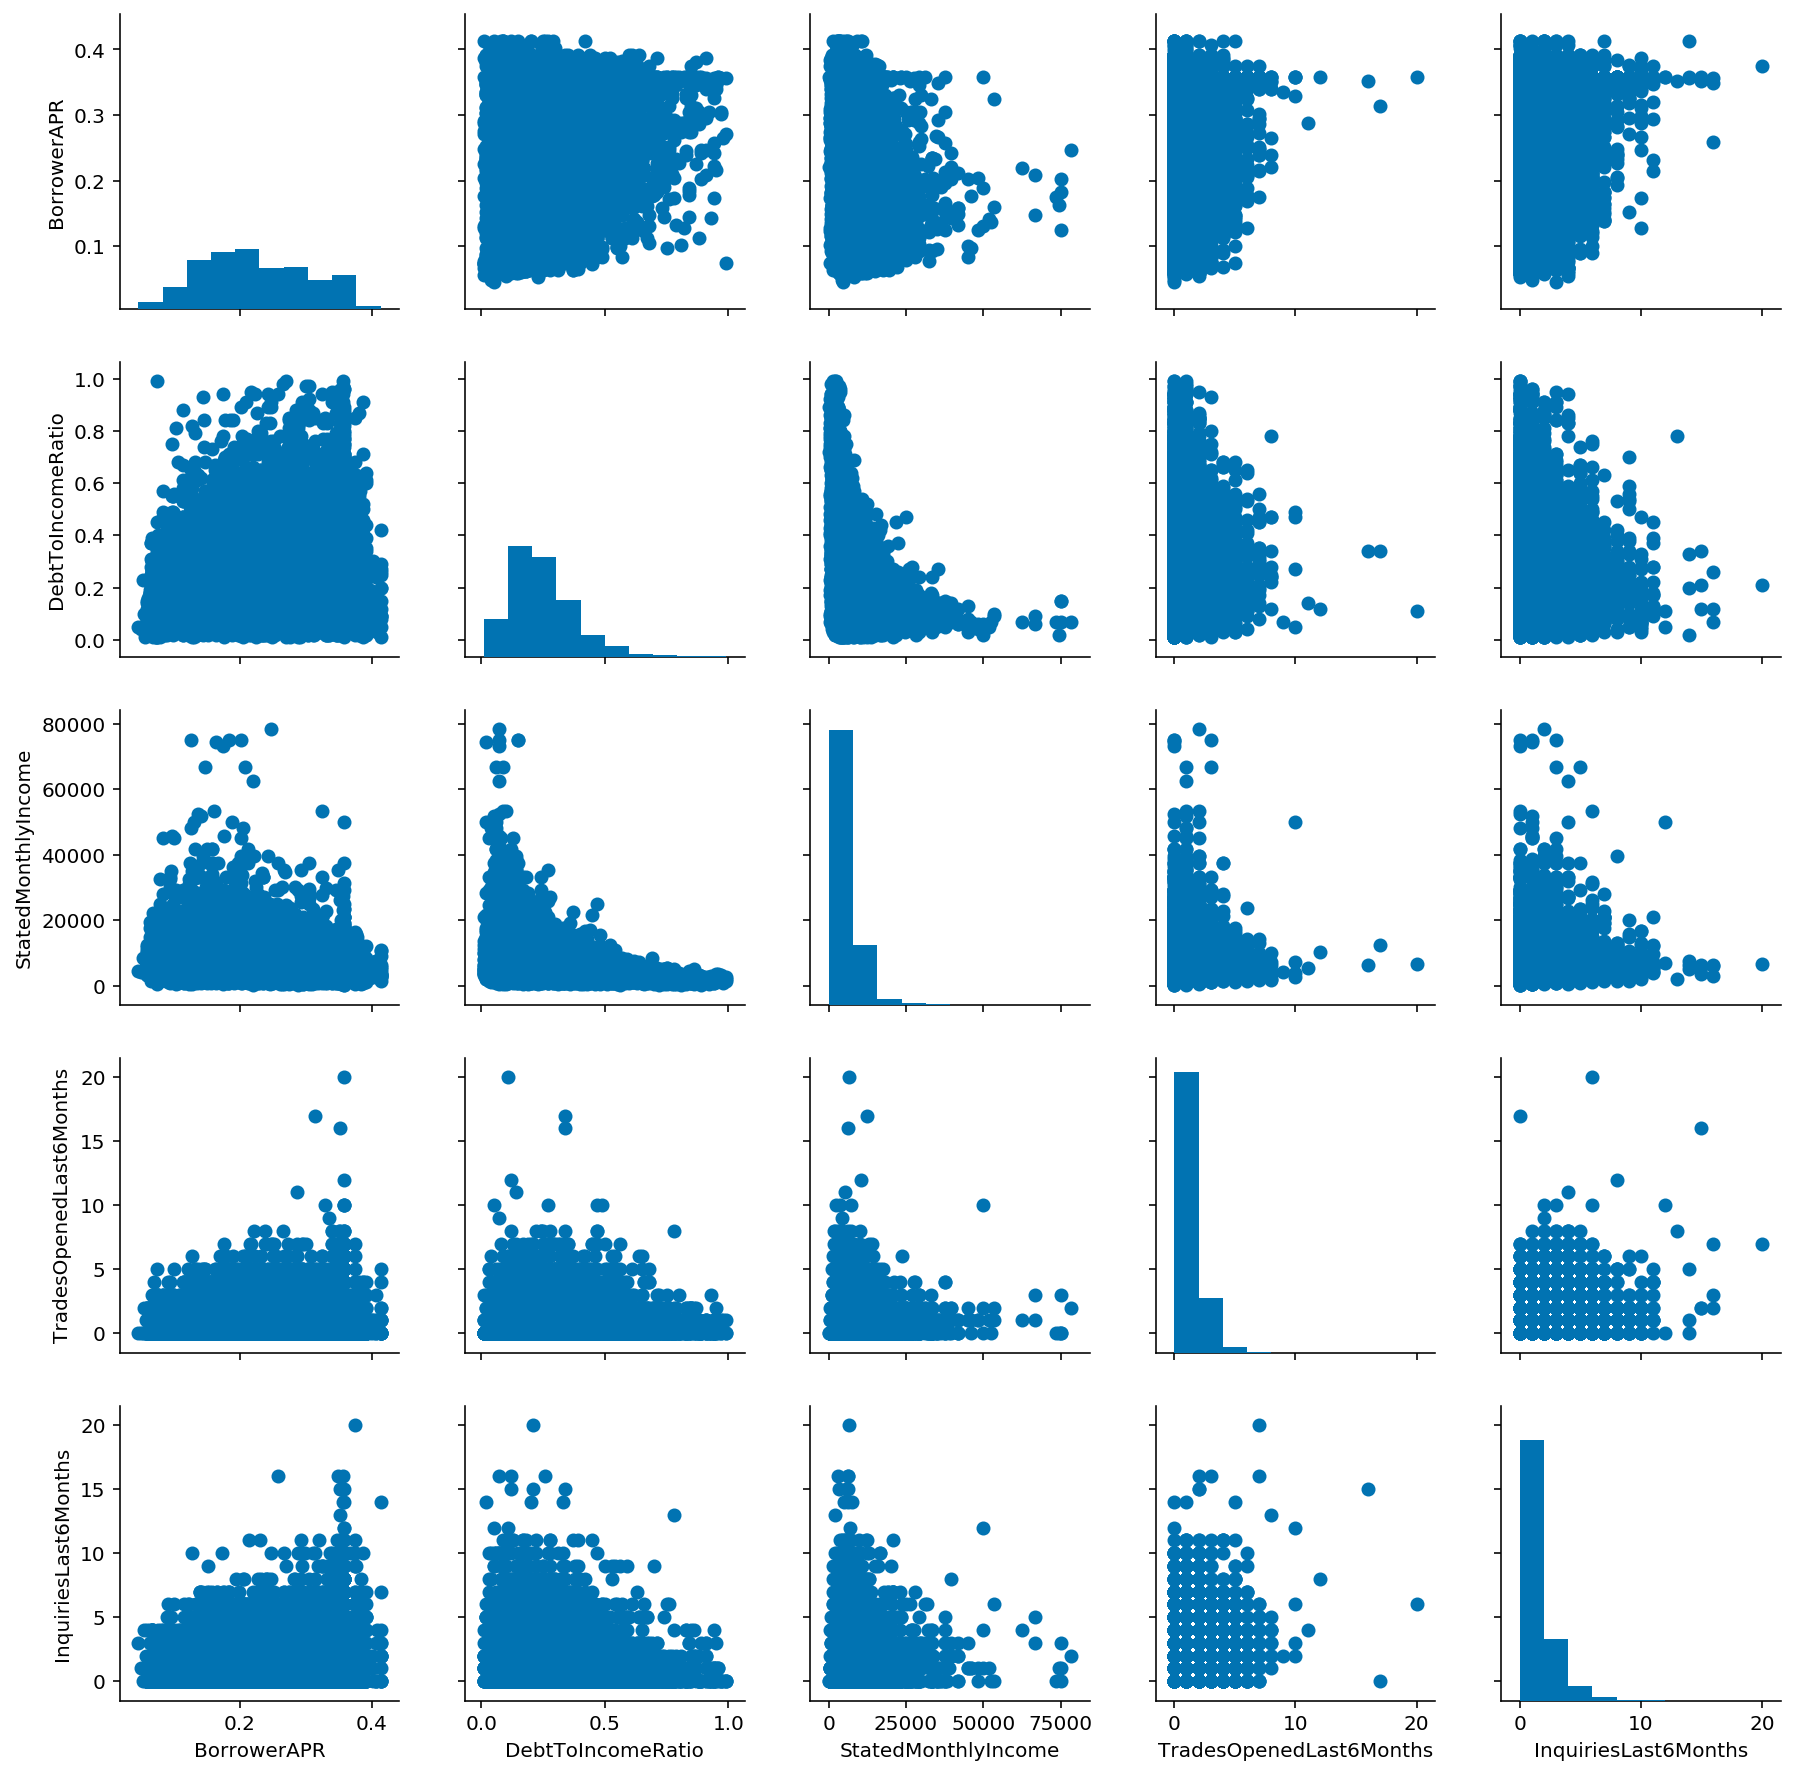

In [70]:
g = sb.PairGrid(data = proloan_nn_t, vars = ['BorrowerAPR','DebtToIncomeRatio','StatedMonthlyIncome','TradesOpenedLast6Months','InquiriesLast6Months'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [58]:
#plt.figure(figsize=(25,10))
#cat_markers = [['AA', '^'],
#               ['HR','_']]

#for cat, marker in cat_markers:
#    proloan_nn_t_cat = proloan_nn_t.loc[proloan_nn_t['ProsperRating (Alpha)'] == cat]
#plt.scatter(data = proloan_nn_t, x = 'DebtToIncomeRatio', y = 'BorrowerAPR')#, marker = marker, alpha = 0.5)
#plt.legend(['AA','A','B','C','D','E','HR'])
#plt.xlim(0,1)
#plt.xscale('log')
#plt.yscale('log')

In [16]:
proloan_nn_t['intercept'] = 1

In [72]:
lm = sm.OLS(proloan_nn_t['BorrowerAPR'], proloan_nn_t[['intercept', 'DebtToIncomeRatio']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            BorrowerAPR   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1323.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          3.16e-284
Time:                        03:39:47   Log-Likelihood:                 38566.
No. Observations:               33929   AIC:                        -7.713e+04
Df Residuals:                   33927   BIC:                        -7.711e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             0.1937      0.001    213.942      0.000       0.192       0.195
DebtToIncomeRatio     0.1188      0.003     36.375      0.000       0.112       0.125
==============================================================================
Omnibus:                     3714.044   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1334.514
Skew:                           0.250   Prob(JB):                    1.64e-290
Kurtosis:                       2.167   Cond. No.                         8.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

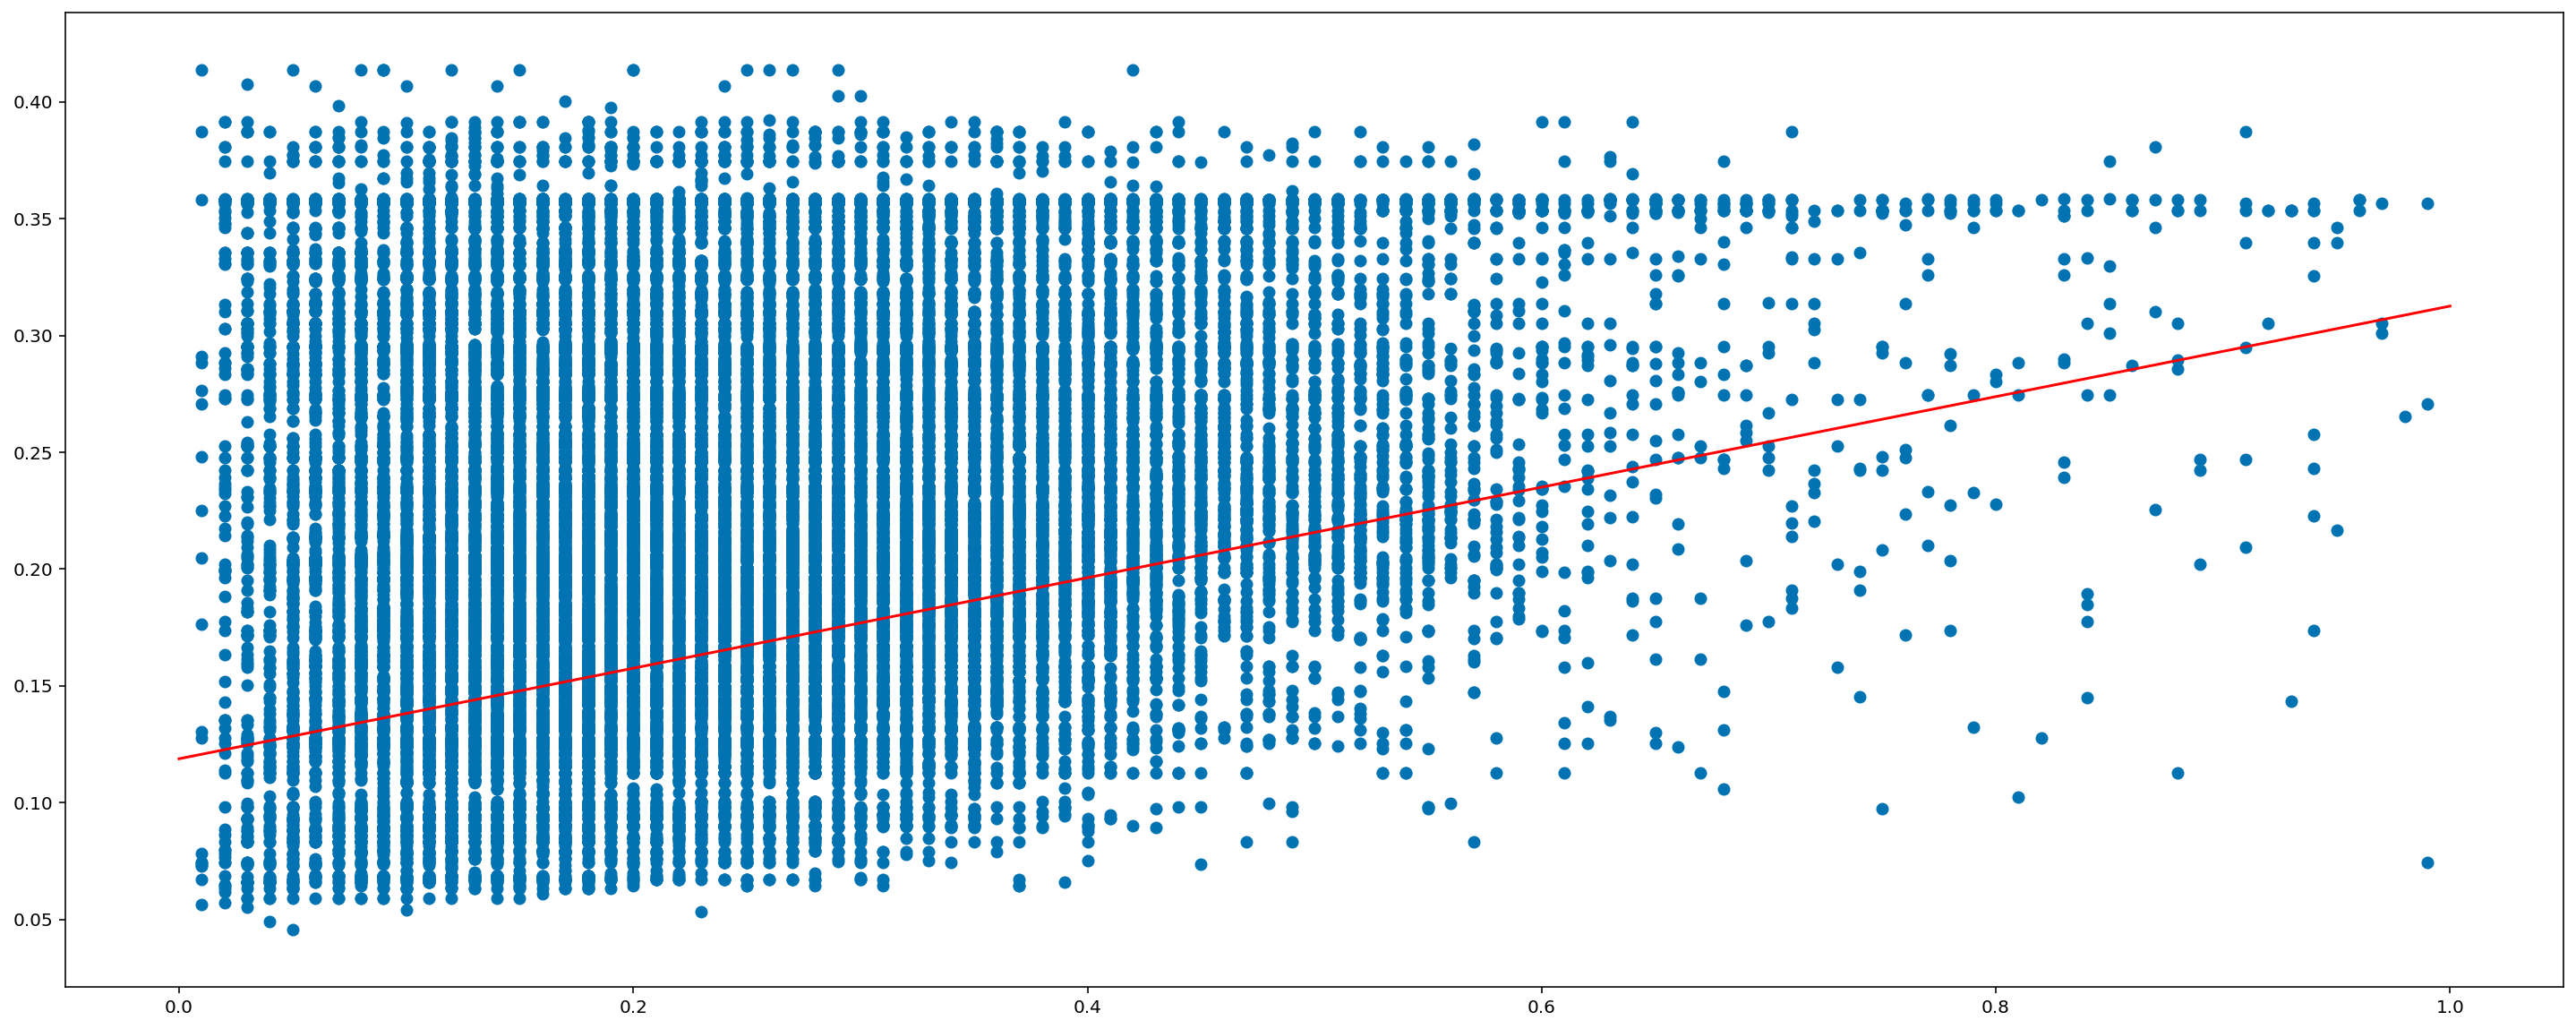

In [74]:
plt.figure(figsize=(25,10))
plt.scatter(data = proloan_nn_t, x = 'DebtToIncomeRatio', y = 'BorrowerAPR')#, marker = marker, alpha = 0.5)
X_plot = np.linspace(0, 1)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1], color='red')


In [19]:
lm = sm.OLS(proloan_nn_t['BorrowerAPR'], proloan_nn_t[['intercept', 'StatedMonthlyIncome']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            BorrowerAPR   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1396.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          1.56e-299
Time:                        04:45:17   Log-Likelihood:                 38601.
No. Observations:               33929   AIC:                        -7.720e+04
Df Residuals:                   33927   BIC:                        -7.718e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.2469      0.001    321.358      0.000       0.245       0.248
StatedMonthlyIncome -4.034e-06   1.08e-07    -37.368      0.000   -4.25e-06   -3.82e-06
==============================================================================
Omnibus:                     3153.599   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1095.889
Skew:                           0.176   Prob(JB):                    1.07e-238
Kurtosis:                       2.193   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
results.params

intercept              0.246854
StatedMonthlyIncome   -0.000004
dtype: float64

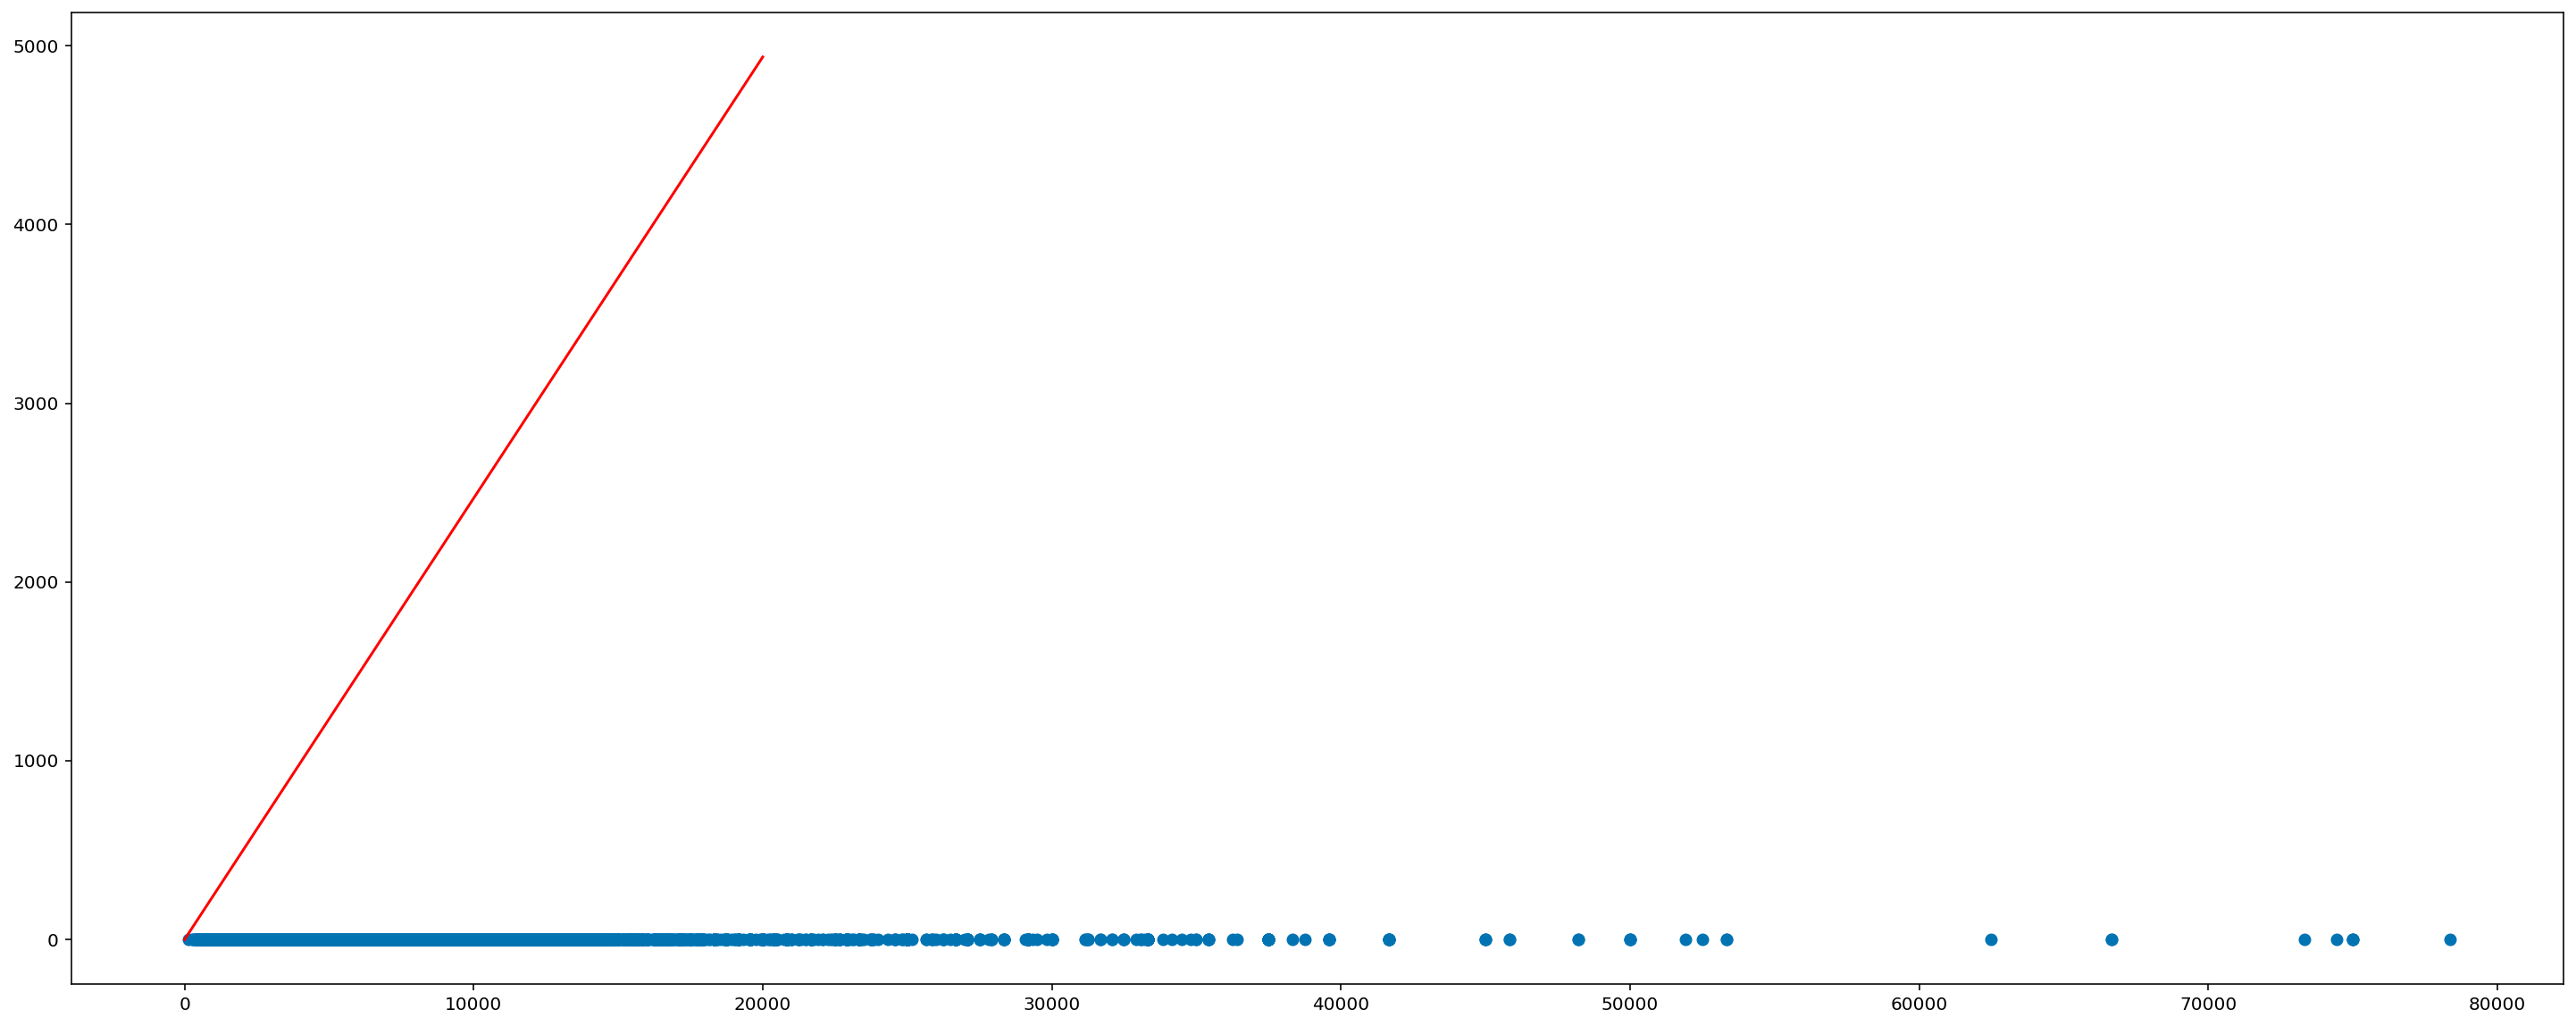

In [23]:
plt.figure(figsize=(25,10))
plt.scatter(data = proloan_nn_t, x = 'StatedMonthlyIncome', y = 'BorrowerAPR')#, marker = marker, alpha = 0.5)

#X_plot = np.linspace(0, 20000)
#plt.plot(X_plot, X_plot*results.params[0] + results.params[1], color='red')

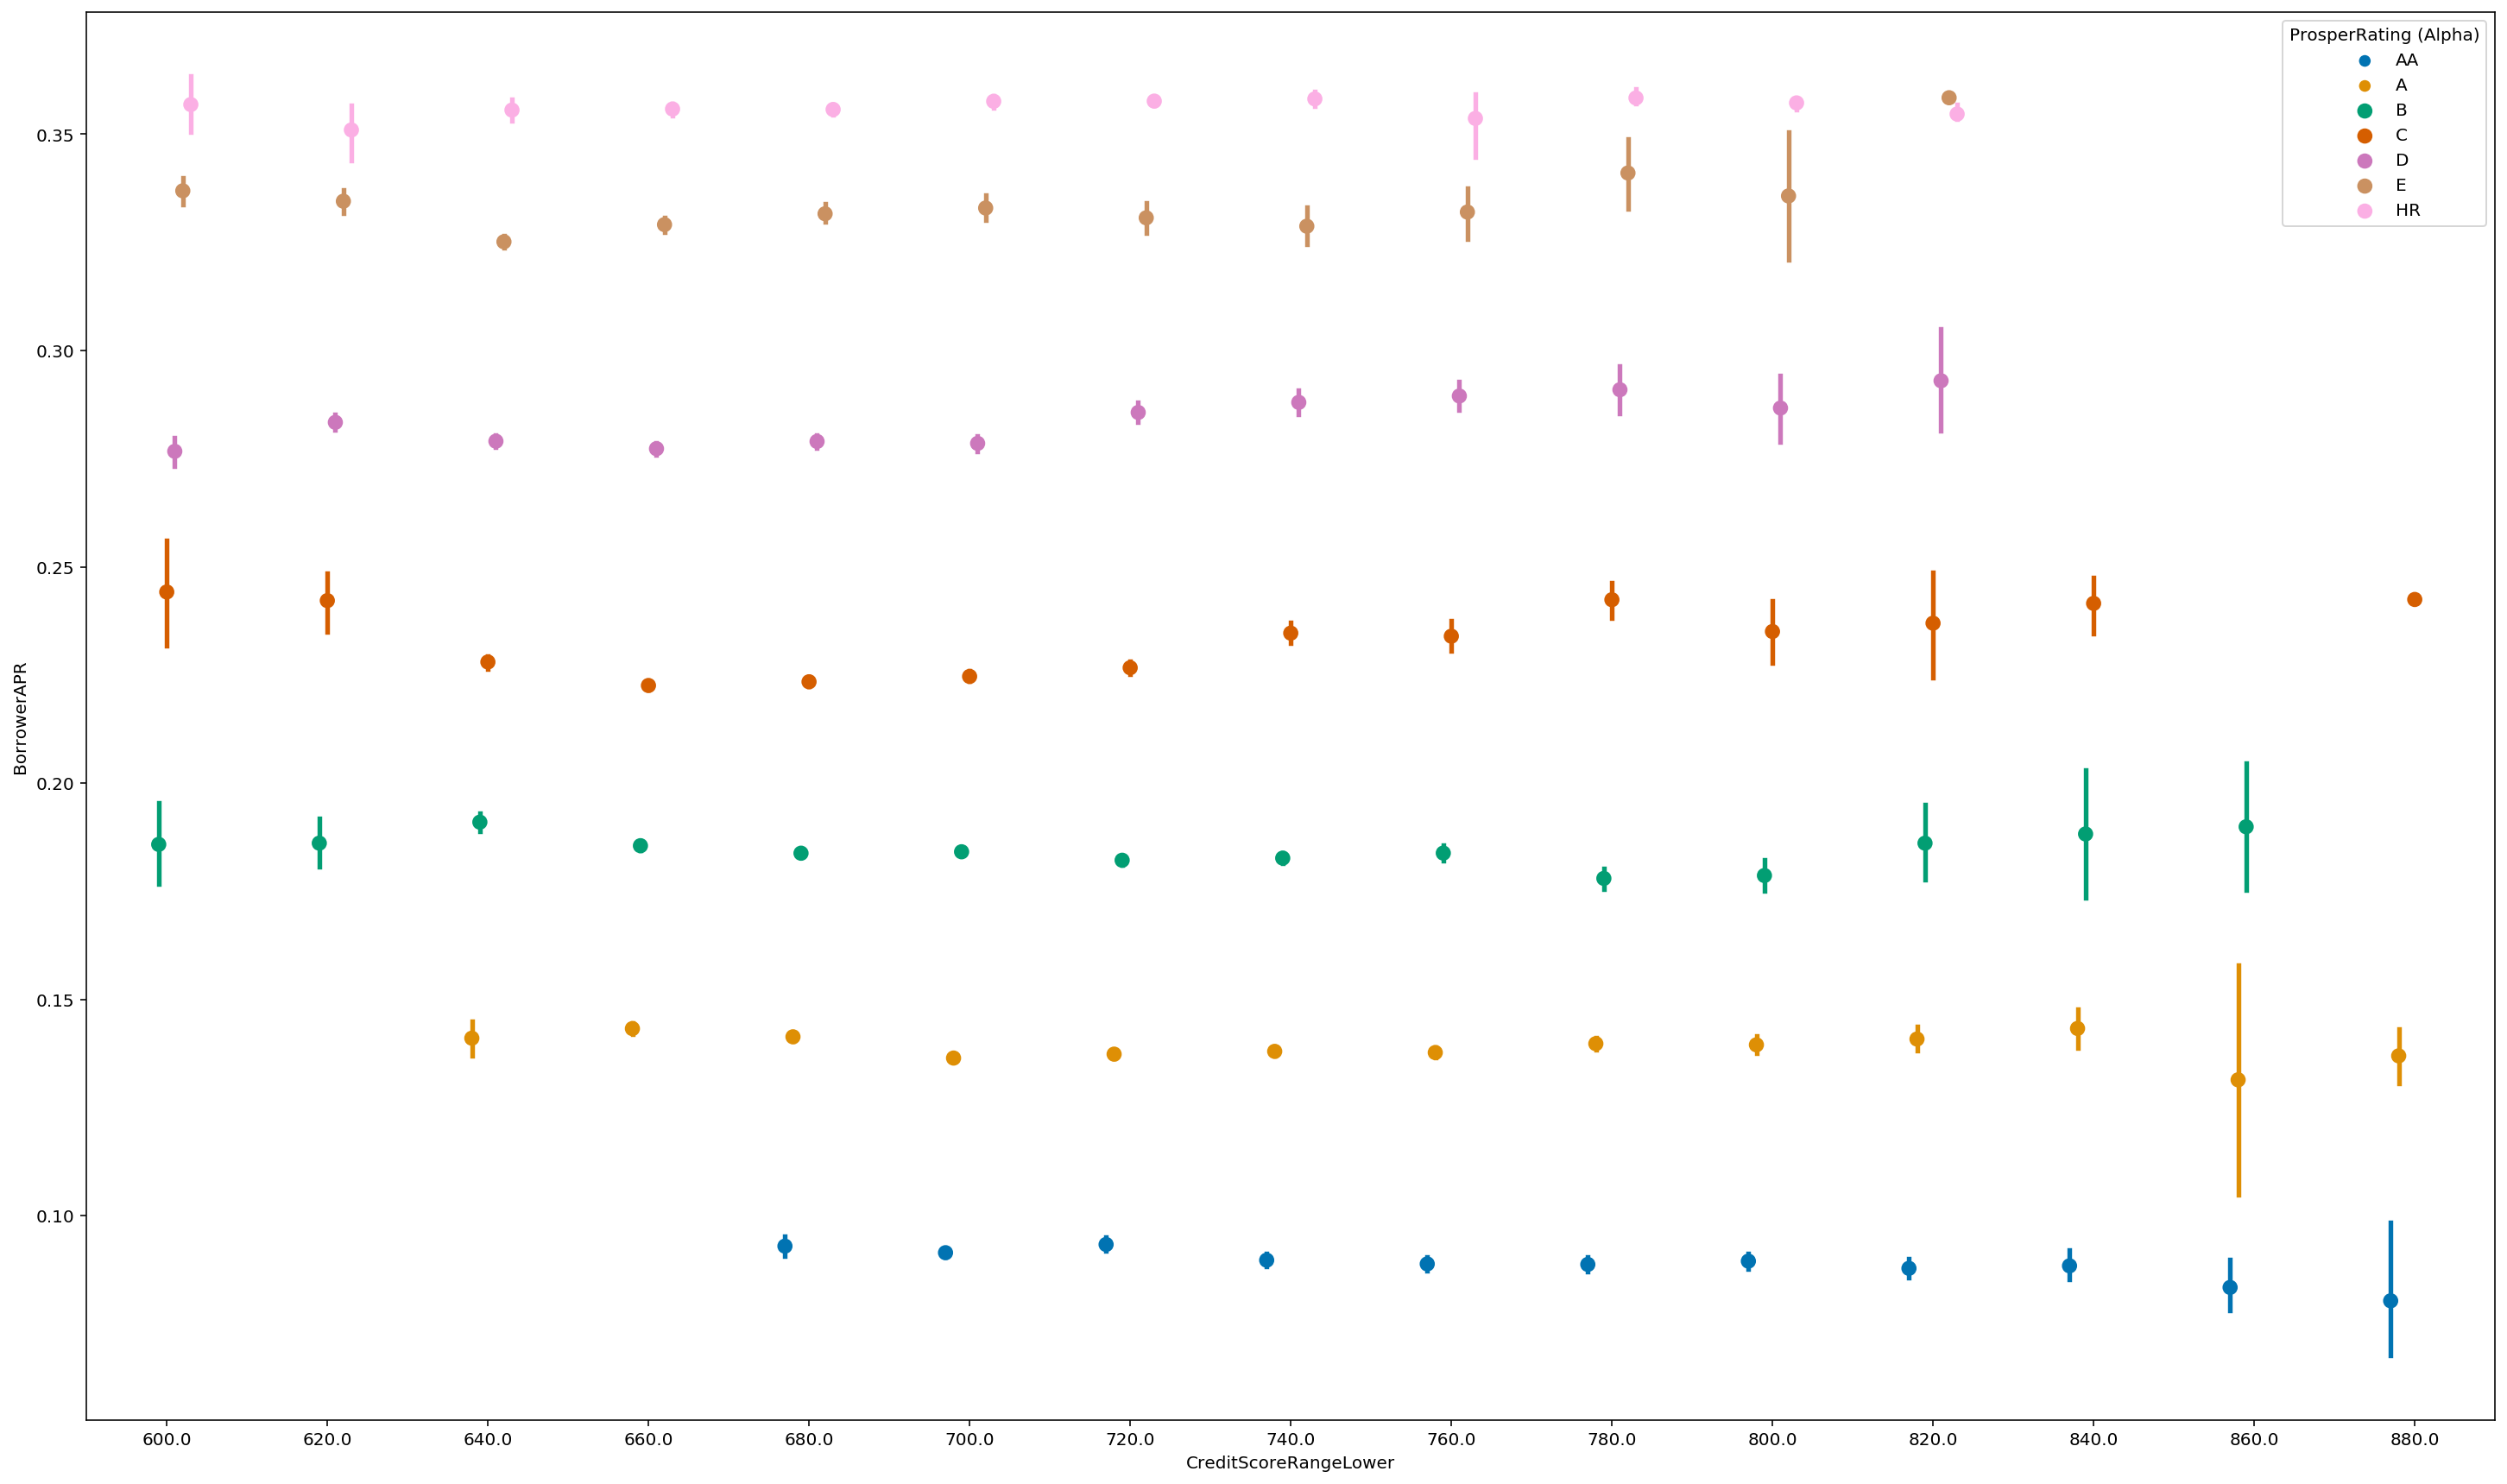

In [37]:
plt.figure(figsize=(25,15))
sb.pointplot(data = proloan_nn_t, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', hue = 'ProsperRating (Alpha)', dodge = 0.3, linestyles = "")

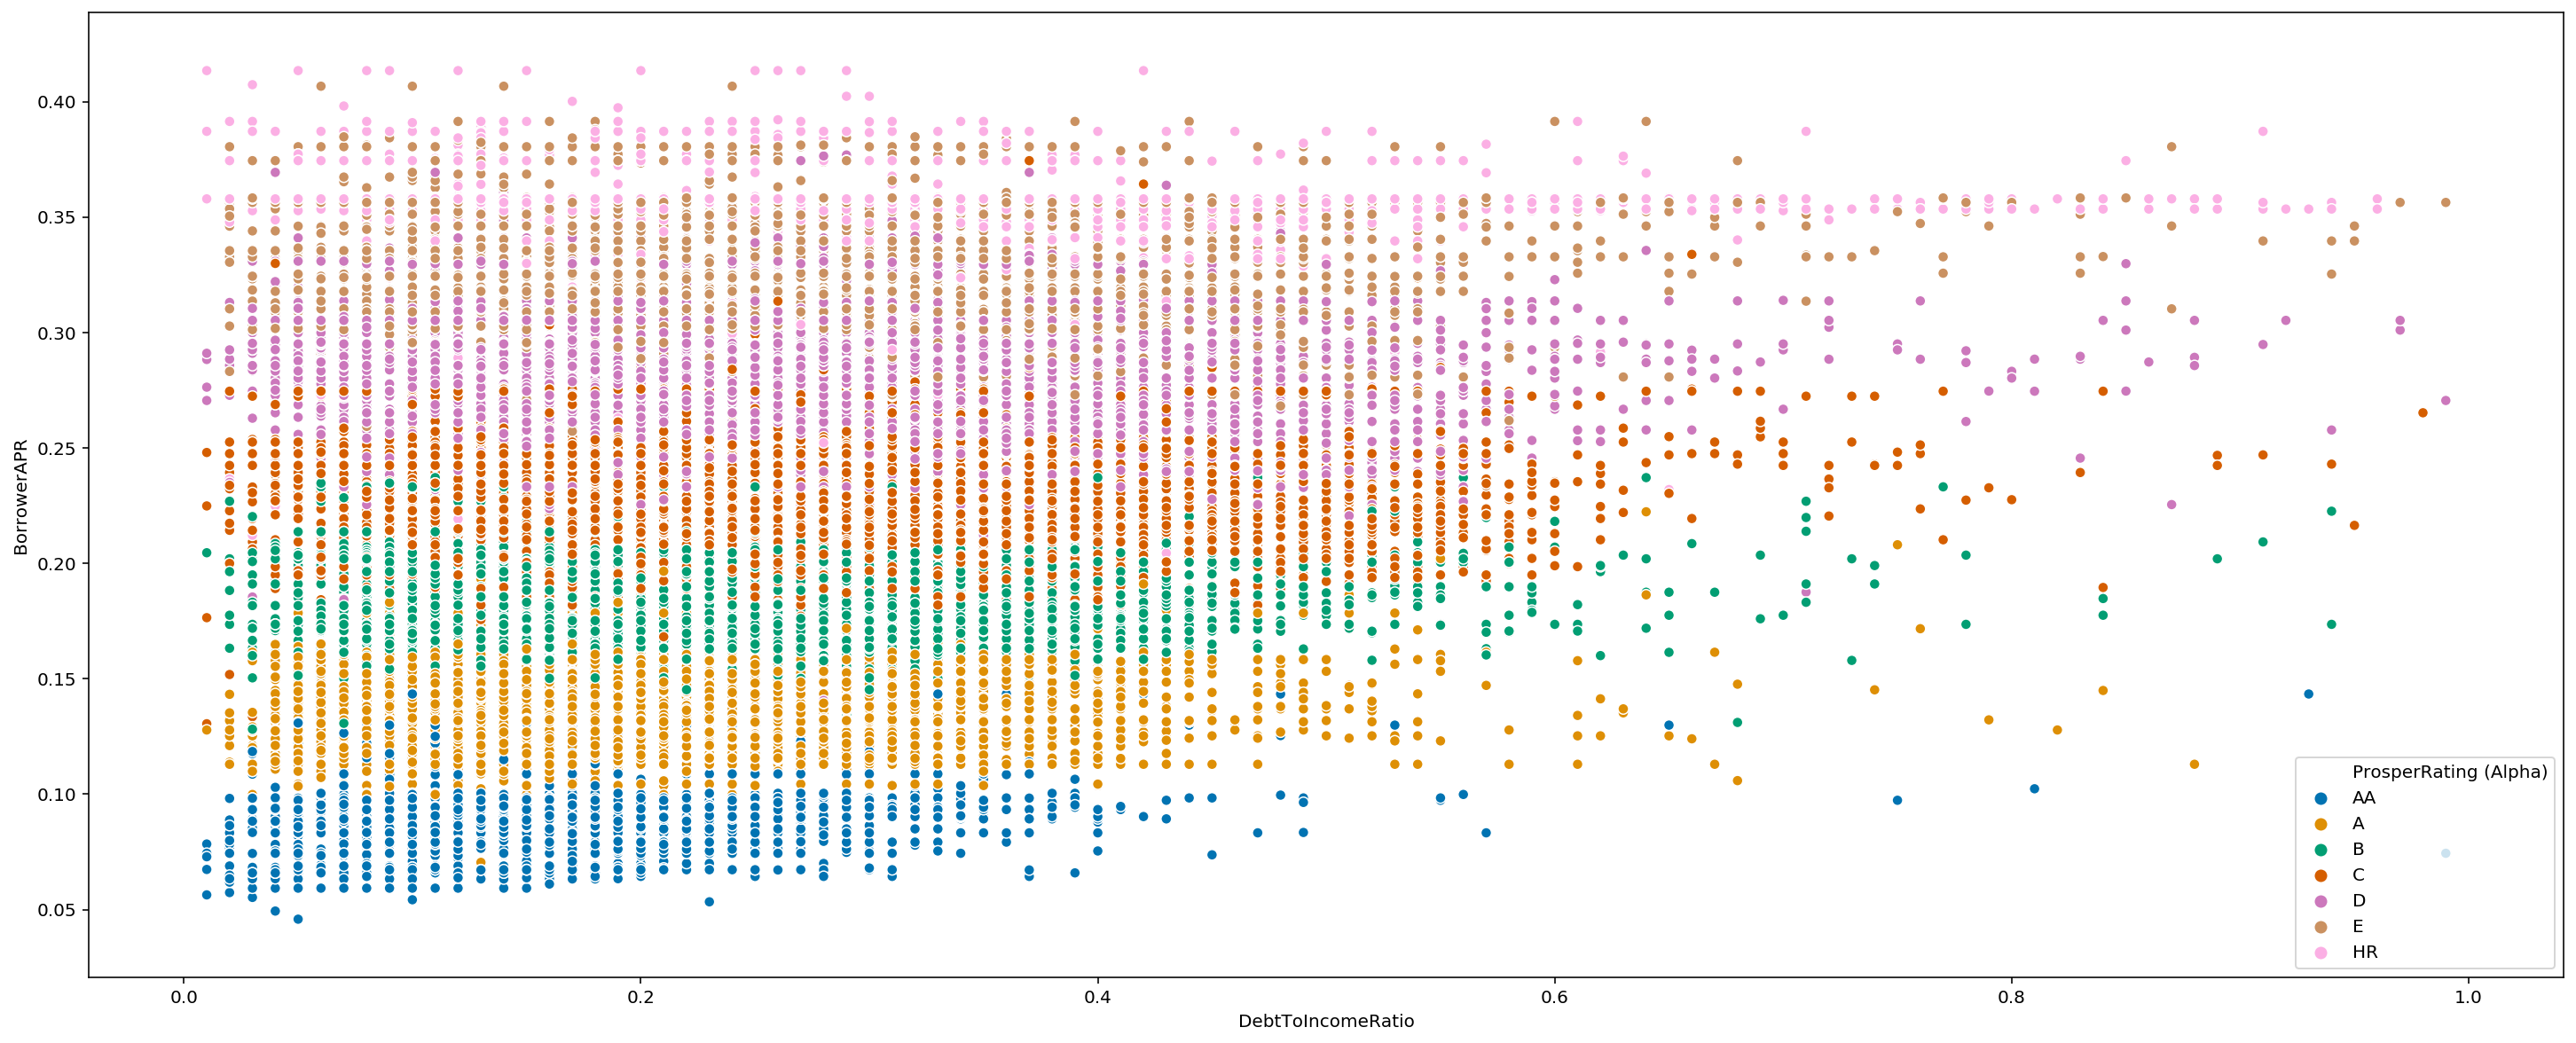

In [35]:
plt.figure(figsize=(25,10))
sb.scatterplot(data = proloan_nn_t, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', hue = 'ProsperRating (Alpha)')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!